#Import Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/airbnb_all.csv')
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,8,9,17,18,20,21,22,24,25,47,50,51,52,53,57,60,70,75,76,83,84,85,96,97,98,100,101,102,104,105,107) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,access,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bathrooms_text,bed_type,bedrooms,beds,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,calendar_last_scraped,calendar_updated,cancellation_policy,city,cleaning_fee,country,country_code,description,experiences_offered,extra_people,first_review,guests_included,has_availability,host_about,host_acceptance_rate,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_listings_count,host_location,host_name,host_neighbourhood,host_picture_url,...,minimum_nights,minimum_nights_avg_ntm,monthly_price,name,neighborhood_overview,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,notes,number_of_reviews,number_of_reviews_l30d,number_of_reviews_ltm,picture_url,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,scrape_id,security_deposit,smart_location,space,square_feet,state,street,summary,thumbnail_url,transit,weekly_price,xl_picture_url,zipcode
0,Guests solely occupy the 1 floor apartment wit...,2,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",0,68,12,20,1.0,NaN,Real Bed,1.0,0.0,1,1,0,0,2020-03-16,5 weeks ago,super_strict_30,Boston,$75.00,United States,US,Fully separate apartment in a two apartment bu...,none,$0.00,2015-07-10,2.0,t,My wife and I and grown children frequently oc...,50%,t,4804,f,t,5.0,Massachusetts,Frank,East Boston,https://a0.muscache.com/im/users/4804/profile_...,...,28,28.0,"$2,250.00",HARBORSIDE-Walk to subway,"Mostly quiet ( no loud music, no crowed sidewa...",East Boston,East Boston,NaN,Building is on quiet side of airport. Building...,16,NaN,1,https://a0.muscache.com/im/pictures/24670/b2de...,$125.00,Apartment,f,f,t,10.0,10.0,10.0,10.0,10.0,99.0,10.0,0.28,Entire home/apt,20200316134736,$0.00,"Boston, MA",This is a totally separate apartment located o...,NaN,MA,"Boston, MA, United States",Fully separate apartment in a two apartment bu...,NaN,Local subway stop ( Maverick Station on the Bl...,$750.00,NaN,02128
1,You get full access to the guest room with pri...,2,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",24,322,46,64,1.0,NaN,Real Bed,1.0,1.0,6,6,0,0,2020-03-16,2 weeks ago,strict_14_with_grace_period,Boston,$60.00,United States,US,"Private guest room with private bath, You do n...",none,$0.00,2009-03-21,1.0,t,"Relaxed, Easy going, Accommodating.",100%,t,8229,t,t,2.0,"Boston, Massachusetts, United States",Terry,Roxbury,https://a0.muscache.com/im/users/8229/profile_...,...,3,3.0,"$3,000.00",**$79 Special ** Private! Minutes to center!,"Peacful, Architecturally interesting, historic...",Roxbury,Roxbury,NaN,"Guest room is on the 3rd floor, Steps are req...",106,NaN,25,https://a0.muscache.com/im/pictures/1598e8b6-5...,$145.00,Guest suite,f,f,t,10.0,10.0,10.0,10.0,9.0,95.0,10.0,0.79,Entire home/apt,20200316134736,$0.00,"Boston, MA",**THE BEST Value in BOSTON!!*** PRIVATE GUEST ...,225.0,MA,"Boston, MA, United States","Private guest room with private bath, You do n...",NaN,"Excellent Access to all of Boston, Walk to Mus...",$980.00,NaN,02119
2,"Full Private apartment. 1 bedroom, kitchen, ...",4,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",11,274,32,42,1.0,NaN,Real Bed,1.0,1.0,6,6,0,0,2020-03-16,2 weeks ago,strict_14_with_grace_period,Boston,$80.00,United States,US,"Comfortable, Fully Equipped private apartment...",none,$8.00,2009-08-06,2.0,t,"Relaxed, Easy going, Accommodating.",100%,t,8229,t,t,2.0,"Boston, Massachusetts, United States",Terry,Roxbury,https://a0.muscache.com/im/users/8229/profile_...,...,3,3.0,NaN,$99 Special!! Home Away! Condo,"Peaceful, Architecturally interesting, histori...",Roxbury,Roxbury,N

#Clean Data

In [ ]:
df['price'].dtype

dtype('O')

In [ ]:
df.iloc[0]['price']

'$125.00'

In [ ]:
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')
df['price']

0         125.00
1         145.00
2         169.00
3          99.00
4         150.00
           ...  
304978     52.00
304979     16.00
304980     32.00
304981     40.00
304982     15.00
Name: price, Length: 304983, dtype: object

In [ ]:
df['price'] = df['price'].astype(float)
df['price'].dtype

dtype('float64')

In [ ]:
df['weekly_price'] = df['weekly_price'].str.replace('$', '')
df['weekly_price'] = df['weekly_price'].str.replace(',', '')
df['weekly_price']

0          750.00
1          980.00
2             NaN
3         1200.00
4         1200.00
           ...   
304978        NaN
304979        NaN
304980        NaN
304981        NaN
304982        NaN
Name: weekly_price, Length: 304983, dtype: object

In [ ]:
df['weekly_price'] = df['weekly_price'].astype(float)
df['weekly_price'].dtype

dtype('float64')

In [ ]:
df['monthly_price'] = df['monthly_price'].str.replace('$', '')
df['monthly_price'] = df['monthly_price'].str.replace(',', '')
df['monthly_price']

0         2250.00
1         3000.00
2             NaN
3         2900.00
4         3000.00
           ...   
304978        NaN
304979        NaN
304980        NaN
304981        NaN
304982        NaN
Name: monthly_price, Length: 304983, dtype: object

In [ ]:
df['monthly_price'] = df['monthly_price'].astype(float)
df['monthly_price'].dtype

dtype('float64')

In [ ]:
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '')
df['host_response_rate'] = df['host_response_rate'].astype(float)
df['host_response_rate'].dtype

dtype('float64')

In [ ]:
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '')
df['host_acceptance_rate'] = df['host_acceptance_rate'].astype(float)
df['host_acceptance_rate'].dtype

dtype('float64')

In [ ]:
df['cleaning_fee'] = df['cleaning_fee'].str.replace('$', '')
df['cleaning_fee'] = df['cleaning_fee'].str.replace(',', '')
df['cleaning_fee'] = df['cleaning_fee'].astype(float)
df['cleaning_fee'].dtype

dtype('float64')

In [ ]:
df['extra_people'] = df['extra_people'].str.replace('$', '')
df['extra_people'] = df['extra_people'].str.replace(',', '')
df['extra_people'] = df['extra_people'].astype(float)
df['extra_people'].dtype

dtype('float64')

In [ ]:
df['security_deposit'] = df['security_deposit'].str.replace('$', '')
df['security_deposit'] = df['security_deposit'].str.replace(',', '')
df['security_deposit'] = df['security_deposit'].astype(float)
df['security_deposit'].dtype

dtype('float64')

In [ ]:
df.dtypes.value_counts()

object     57
float64    31
int64      20
dtype: int64

In [ ]:
df.select_dtypes(include=['int', 'float']).isna().sum()

accommodates                                         0
availability_30                                      0
availability_365                                     0
availability_60                                      0
availability_90                                      0
bathrooms                                        20953
bedrooms                                          1081
beds                                              3041
calculated_host_listings_count                       0
calculated_host_listings_count_entire_homes          0
calculated_host_listings_count_private_rooms         0
calculated_host_listings_count_shared_rooms          0
cleaning_fee                                     80438
extra_people                                     20703
guests_included                                  20703
host_acceptance_rate                             68875
host_id                                              0
host_listings_count                                 58
host_respo

In [ ]:
df.select_dtypes(include=['int', 'float']).isna().sum()/len(df)*100

accommodates                                      0.000000
availability_30                                   0.000000
availability_365                                  0.000000
availability_60                                   0.000000
availability_90                                   0.000000
bathrooms                                         6.870219
bedrooms                                          0.354446
beds                                              0.997105
calculated_host_listings_count                    0.000000
calculated_host_listings_count_entire_homes       0.000000
calculated_host_listings_count_private_rooms      0.000000
calculated_host_listings_count_shared_rooms       0.000000
cleaning_fee                                     26.374585
extra_people                                      6.788247
guests_included                                   6.788247
host_acceptance_rate                             22.583226
host_id                                           0.0000

In [ ]:
df.drop(['xl_picture_url', 'thumbnail_url','square_feet','number_of_reviews_l30d','scrape_id','medium_url'], axis=1, inplace=True)

In [ ]:
df.select_dtypes(include=['int', 'float']).isna().sum()/len(df)*100

accommodates                                     0.000000
availability_30                                  0.000000
availability_365                                 0.000000
availability_60                                  0.000000
availability_90                                  0.000000
bathrooms                                        6.870219
bedrooms                                         0.354446
beds                                             0.997105
calculated_host_listings_count                   0.000000
calculated_host_listings_count_entire_homes      0.000000
calculated_host_listings_count_private_rooms     0.000000
calculated_host_listings_count_shared_rooms      0.000000
cleaning_fee                                    26.374585
extra_people                                     6.788247
guests_included                                  6.788247
host_acceptance_rate                            22.583226
host_id                                          0.000000
host_listings_

In [ ]:
df.select_dtypes(include =['int','float']).describe()

,accommodates,availability_30,availability_365,availability_60,availability_90,bathrooms,bedrooms,beds,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,cleaning_fee,extra_people,guests_included,host_acceptance_rate,host_id,host_listings_count,host_response_rate,host_total_listings_count,id,latitude,longitude,maximum_maximum_nights,maximum_minimum_nights,maximum_nights,maximum_nights_avg_ntm,minimum_maximum_nights,minimum_minimum_nights,minimum_nights,minimum_nights_avg_ntm,monthly_price,number_of_reviews,number_of_reviews_ltm,price,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,security_deposit,weekly_price
count,304983.000000,304983.000000,304983.000000,304983.000000,304983.000000,284030.000000,303902.000000,301942.000000,304983.000000,304983.000000,304983.000000,304983.000000,224545.000000,284280.000000,284280.000000,236108.000000,3.049830e+05,304925.000000,207394.000000,304925.000000,3.049830e+05,304983.000000,304983.000000,3.049830e+05,304983.000000,3.049830e+05,3.049830e+05,3.049830e+05,304983.000000,304983.000000,304983.000000,18905.000000,304983.000000,304983.000000,304983.000000,230636.000000,230529.000000,230684.000000,230667.000000,230525.000000,230874.000000,230512.000000,236213.000000,195415.000000,23617.000000
mean,3.314752,12.387776,135.205185,26.157487,40.525757,1.318699,1.419711,1.852478,13.619169,11.199631,1.919602,0.188922,67.094097,11.739947,1.697270,85.140004,9.325688e+07,28.230309,93.787347,28.230309,2.465786e+07,31.465713,-14.152597,7.914709e+05,11.148969,5.205862e+04,7.529776e+05,7.280901e+05,7.071447,7.279658,10.414636,2851.178418,25.824321,9.362820,164.429460,9.562120,9.691822,9.318678,9.696341,9.627368,93.325714,9.327822,1.396805,288.520262,842.532921
std,2.252690,12.414257,137.682772,24.673988,37.062341,0.708363,0.977428,1.510430,59.935061,58.836822,9.235224,2.178062,72.528173,21.848681,1.455719,24.140098,9.609847e+07,166.455697,17.244250,166.455697,1.255379e+07,29.066060,83.979850,4.105306e+07,54.822810,9.912323e+06,3.988520e+07,3.936190e+07,24.393027,23.555685,50.365943,2879.919337,51.730894,17.073452,403.169329,0.933283,0.818138,1.092201,0.830822,0.760590,9.520916,0.991311,1.702073,1059.276500,867.155391
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.210000e+02,0.000000,0.000000,0.000000,1.090000e+02,-43.580120,-118.934220,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,20.000000,2.000000,0.010000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,20.000000,0.000000,1.000000,81.000000,1.499773e+07,1.000000,98.000000,1.000000,1.470349e+07,34.083420,-77.008320,6.000000e+01,1.000000,3.000000e+01,6.000000e+01,5.000000e+01,1.000000,1.000000,1.000000,1365.000000,1.000000,0.000000,59.000000,9.000000,10.000000,9.000000,10.000000,9.000000,91.000000,9.000000,0.230000,0.000000,400.000000
50%,2.000000,10.000000,88.000000,24.000000,41.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,50.000000,0.000000,1.000000,97.000000,5.031066e+07,1.000000,100.000000,1.000000,2.507691e+07,41.373320,-0.226990,1.125000e+03,2.000000,1.125000e+03,1.125000e+03,1.125000e+03,2.000000,2.000000,2.000000,2200.000000,5.000000,2.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,96.000000,10.000000,0.760000,150.000000,625.000000
75%,4.000000,26.000000,270.000000,53.000000,80.000000,1.500000,2.000000,2.000000,4.000000,2.000000,1.000000,0.000000,90.000000,20.000000,2.000000,100.000000,1.550818e+08,5.000000,100.000000,5.000000,3.617490e+07,51.484140,0.044215,1.

In [ ]:
df['weekly_price'].fillna(0, inplace=True)
df['weekly_price'].isna().sum()

0

In [ ]:
df['monthly_price'].fillna(0, inplace=True)
df['monthly_price'].isna().sum()

0

In [ ]:
cities = df['city'].unique()

In [ ]:
all = []
for city in cities:
  temp = df[df['city']==city]
  mean_acc = round(temp['host_acceptance_rate'].mean(),0)
  mean_res = round(temp['host_response_rate'].mean(),0)
  median_guests = temp['guests_included'].median()
  median_bathrooms = temp['bathrooms'].median()
  median_bedrooms = temp['bedrooms'].median()
  median_beds = temp['beds'].median()
  median_hlc = temp['host_listings_count'].median()
  median_htlc = temp['host_total_listings_count'].median()
  median_exp = temp['extra_people'].median()
  mean_clean = temp['cleaning_fee'].mean()
  temp['host_acceptance_rate'].fillna(mean_acc, inplace=True)
  temp['host_response_rate'].fillna(mean_res, inplace=True)
  temp['guests_included'].fillna(median_guests, inplace=True)
  temp['bathrooms'].fillna(median_bathrooms, inplace=True)
  temp['bedrooms'].fillna(median_bedrooms, inplace=True)
  temp['beds'].fillna(median_beds, inplace=True)
  temp['host_listings_count'].fillna(median_hlc, inplace=True)
  temp['host_total_listings_count'].fillna(median_htlc, inplace=True)
  temp['extra_people'].fillna(median_exp, inplace=True)
  temp['cleaning_fee'].fillna(mean_clean, inplace=True)
  all.append(temp)

In [ ]:
df = pd.concat(all)

In [ ]:
print('Acceptance NAs:', df['host_acceptance_rate'].isna().sum())
print('Response NAs:', df['host_response_rate'].isna().sum())

Acceptance NAs: 0
Response NAs: 0


In [ ]:
df.select_dtypes(include=['int', 'float']).isna().sum()/len(df)*100

accommodates                                     0.000000
availability_30                                  0.000000
availability_365                                 0.000000
availability_60                                  0.000000
availability_90                                  0.000000
bathrooms                                        6.788247
bedrooms                                         0.000000
beds                                             0.000000
calculated_host_listings_count                   0.000000
calculated_host_listings_count_entire_homes      0.000000
calculated_host_listings_count_private_rooms     0.000000
calculated_host_listings_count_shared_rooms      0.000000
cleaning_fee                                     6.788247
extra_people                                     6.788247
guests_included                                  6.788247
host_acceptance_rate                             0.000000
host_id                                          0.000000
host_listings_

In [ ]:
df['city'].value_counts()/len(df)*100

London           28.896365
NY               16.655355
Sydney           13.007282
LA               12.617425
Toronto           7.542715
Barcelona         6.788247
Washington DC     3.047383
Dublin            2.997872
Chicago           2.886718
Singapore         2.528993
Tasmania          1.786001
Boston            1.245643
Name: city, dtype: float64

In [ ]:
df['bathrooms'].fillna(1, inplace=True)
df['extra_people'].fillna(0, inplace=True)
df['guests_included'].fillna(1, inplace=True)
df['cleaning_fee'].fillna(0, inplace=True)
df['security_deposit'].fillna(0, inplace=True)

In [ ]:
df.select_dtypes(include=['int', 'float']).isna().sum()/len(df)*100

accommodates                                     0.000000
availability_30                                  0.000000
availability_365                                 0.000000
availability_60                                  0.000000
availability_90                                  0.000000
bathrooms                                        0.000000
bedrooms                                         0.000000
beds                                             0.000000
calculated_host_listings_count                   0.000000
calculated_host_listings_count_entire_homes      0.000000
calculated_host_listings_count_private_rooms     0.000000
calculated_host_listings_count_shared_rooms      0.000000
cleaning_fee                                     0.000000
extra_people                                     0.000000
guests_included                                  0.000000
host_acceptance_rate                             0.000000
host_id                                          0.000000
host_listings_

In [ ]:
df['total_spending'] = (df['price'] * df['minimum_nights']) + df['cleaning_fee'] + df['security_deposit']

#Exploratory Data Analysis

In [ ]:
df['city'].value_counts()

London           88129
NY               50796
Sydney           39670
LA               38481
Toronto          23004
Barcelona        20703
Washington DC     9294
Dublin            9143
Chicago           8804
Singapore         7713
Tasmania          5447
Boston            3799
Name: city, dtype: int64

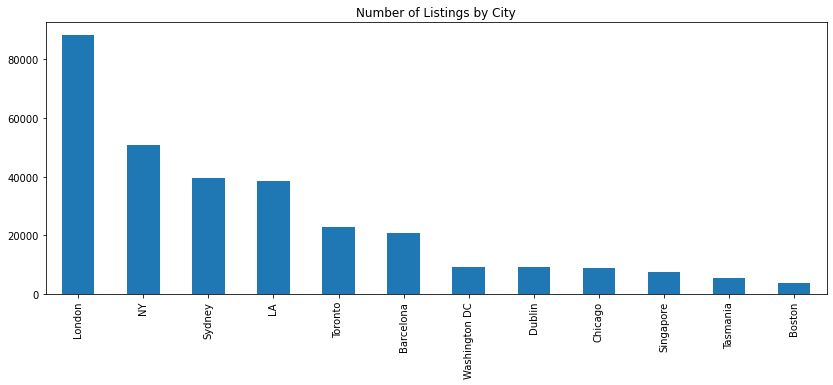

In [ ]:
plt.figure(figsize=(14,5))
df['city'].value_counts().plot.bar()
plt.title('Number of Listings by City')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [ ]:
df['cancellation_policy'].value_counts()

strict_14_with_grace_period    123841
flexible                        85807
moderate                        71942
super_strict_60                  1233
super_strict_30                   699
strict                            549
luxury_moderate                   160
luxury_super_strict_95             19
luxury_no_refund                   16
luxury_super_strict_125            14
Name: cancellation_policy, dtype: int64

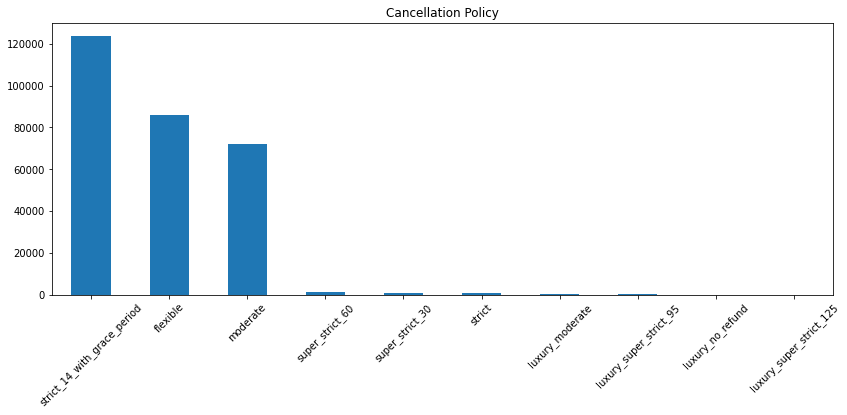

In [ ]:
plt.figure(figsize=(14,5))
plot = df['cancellation_policy'].value_counts().plot.bar()
plt.title('Cancellation Policy')
plt.xlabel('')
plt.ylabel('')
plt.setp(plot.get_xticklabels(), rotation=45)
plt.show()

In [ ]:
df['room_type'].value_counts()

Entire home/apt    177035
Private room       119401
Shared room          5533
Hotel room           3014
Name: room_type, dtype: int64

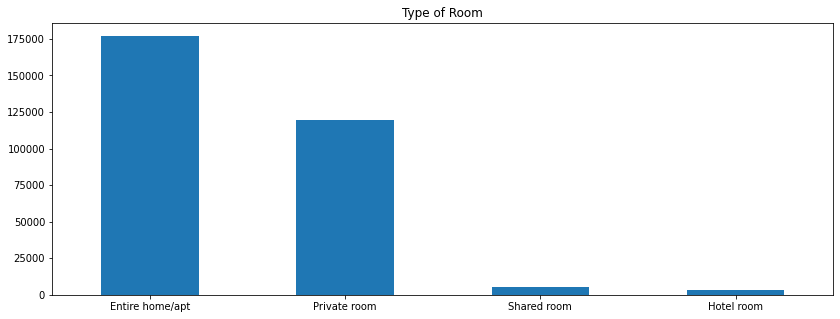

In [ ]:
plt.figure(figsize=(14,5))
plot = df['room_type'].value_counts().plot.bar()
plt.title('Type of Room')
plt.xlabel('')
plt.ylabel('')
plt.setp(plot.get_xticklabels(), rotation=0)
plt.show()

In [ ]:
print(df['total_spending'].describe())
print('\n')
print('NAs:', df['total_spending'].isna().sum())

count    3.049830e+05
mean     1.507579e+03
std      2.005847e+04
min      0.000000e+00
25%      1.786200e+02
50%      4.150000e+02
75%      9.860000e+02
max      6.993060e+06
Name: total_spending, dtype: float64


NAs: 0


In [ ]:
spending_stats = []
for city in cities:
  temp = df[df['city']==city]
  temp2 = temp['total_spending'].describe()
  spending_stats.append(temp2)

In [ ]:
spending_stats_df = pd.DataFrame(spending_stats).T
spending_stats_df.columns = [cities]

In [ ]:
spending_stats_df

,Boston,Chicago,Dublin,London,LA,NY,Singapore,Sydney,Tasmania,Toronto,Washington DC,Barcelona
count,3799.000000,8804.000000,9143.000000,8.812900e+04,3.848100e+04,5.079600e+04,7.713000e+03,39670.000000,5447.000000,23004.000000,9294.000000,20703.000000
mean,5340.316512,1198.941753,845.389338,8.860075e+02,2.918198e+03,1.646544e+03,3.304068e+03,1515.816055,461.197681,1361.608814,1279.963389,765.585355
std,14516.729876,9164.184438,8473.899706,3.090935e+04,1.846065e+04,1.549928e+04,2.925312e+04,6548.808842,833.333035,9325.221074,4115.664109,3935.031343
min,44.000000,0.000000,20.000000,0.000000e+00,1.000000e+01,1.000000e+01,1.400000e+01,20.000000,26.000000,12.000000,10.000000,0.000000
25%,358.000000,180.000000,124.083421,1.320000e+02,2.600000e+02,2.220000e+02,2.636586e+02,278.000000,175.000000,230.000000,225.000000,70.000000
50%,1460.000000,410.000000,260.000000,2.986200e+02,7.000000e+02,4.750000e+02,7.800000e+02,580.000000,301.000000,478.555345,449.000000,162.000000
75%,6345.902136,890.000000,595.041711,6.350000e+02,2.725000e+03,1.070000e+03,2.241000e+03,1241.000000,540.000000,921.000000,981.884219,600.000000
max,720415.000000,799950.000000,558035.083421,6.993060e+06,2.372596e+06,2.340250e+06,1.825039e+06,720594.940103,37530.000000,839561.555345,198081.536878,324000.000000


In [ ]:
print(df['price'].describe())
print('\n')
print('NAs:', df['price'].isna().sum())

count    304983.000000
mean        164.429460
std         403.169329
min           0.000000
25%          59.000000
50%         100.000000
75%         168.000000
max       25000.000000
Name: price, dtype: float64


NAs: 0


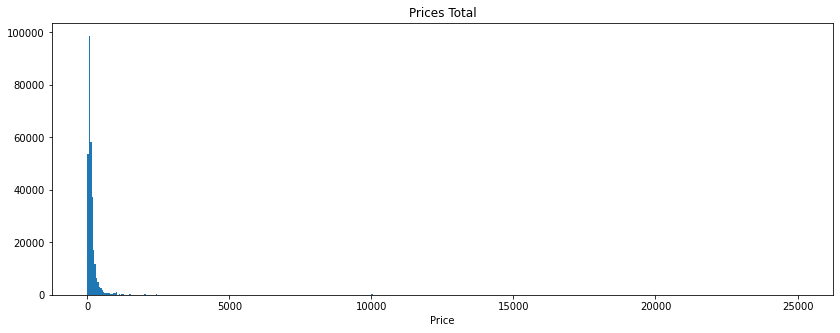

In [ ]:
plt.figure(figsize=(14,5))
df['price'].plot(kind='hist',bins=500)
plt.title('Prices Total')
plt.xlabel('Price')
plt.ylabel('')
plt.show()

In [ ]:
expensive = df[df['price']>= 500]
df = df[df['price']<=500]
expensive['city'].value_counts()

London           2725
Sydney           2638
LA               2438
NY               1375
Washington DC     608
Toronto           580
Chicago           429
Dublin            295
Singapore         230
Barcelona         227
Tasmania          134
Boston            128
Name: city, dtype: int64

In [ ]:
prices_stats = []
for city in cities:
  temp = df[df['city']==city]
  temp2 = temp['price'].describe()
  prices_stats.append(temp2)

In [ ]:
prices_stats_df = pd.DataFrame(prices_stats).T
prices_stats_df.columns = [cities]

In [ ]:
prices_stats_df

,Boston,Chicago,Dublin,London,LA,NY,Singapore,Sydney,Tasmania,Toronto,Washington DC,Barcelona
count,3700.000000,8460.000000,8990.000000,85818.000000,36235.000000,49609.000000,7510.000000,37116.000000,5313.000000,22506.000000,8758.000000,20499.000000
mean,154.834595,130.252719,114.489766,104.989070,132.785180,130.751194,139.549001,151.326247,165.944664,122.255843,137.349052,74.543775
std,96.844740,97.770594,91.301185,84.730329,94.917388,87.663322,93.360592,101.630031,82.291368,84.554167,92.164434,64.285000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,15.000000,0.000000,0.000000,0.000000
25%,80.000000,64.000000,55.000000,45.000000,68.000000,67.000000,65.000000,75.000000,110.000000,64.000000,75.000000,34.000000
50%,135.000000,100.000000,85.000000,80.000000,100.000000,100.000000,120.000000,124.000000,150.000000,99.000000,110.000000,55.000000
75%,200.000000,160.000000,147.000000,130.000000,169.000000,170.000000,185.000000,199.000000,200.000000,151.000000,166.000000,94.000000
max,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000,500.000000,500.000000,500.000000


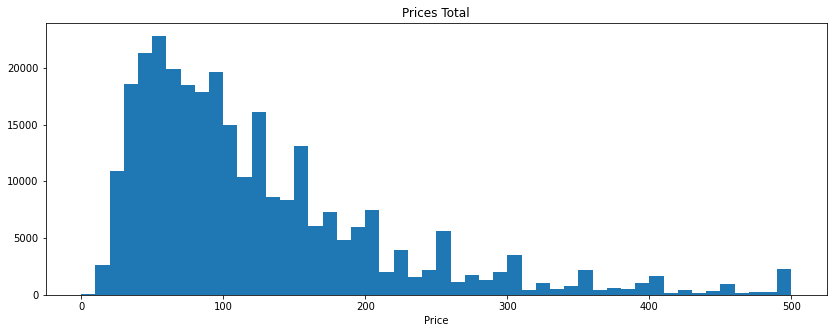

In [ ]:
plt.figure(figsize=(14,5))
df['price'].plot(kind='hist',bins=50)
plt.title('Prices Total')
plt.xlabel('Price')
plt.ylabel('')
plt.show()

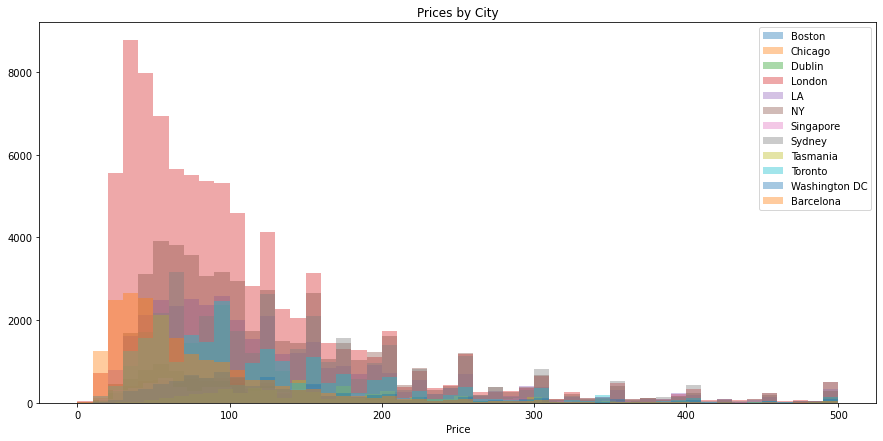

In [ ]:
def plotcity_one(city):
  temp = df[df['city'] == city]
  #plt.figure()
  temp['price'].plot(kind='hist',bins=50, alpha=0.4, figsize=(15,7))
  plt.title('Prices by City')
  plt.xlabel('Price')
  plt.ylabel('')

for city in cities:
    plotcity_one(city)

plt.legend(cities)
plt.show()

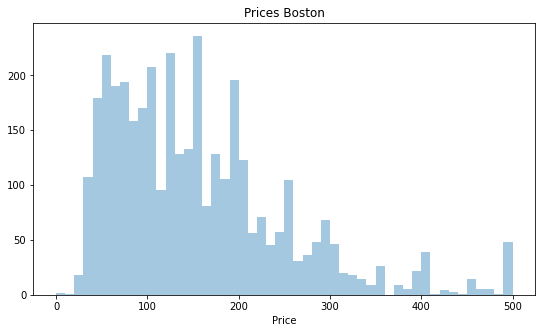

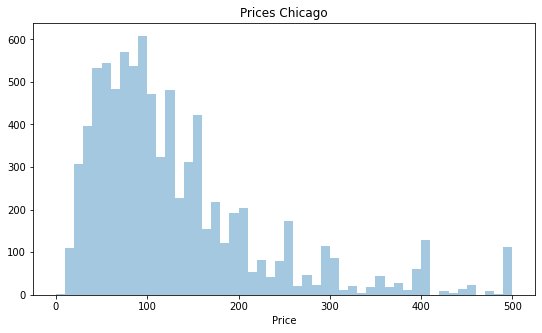

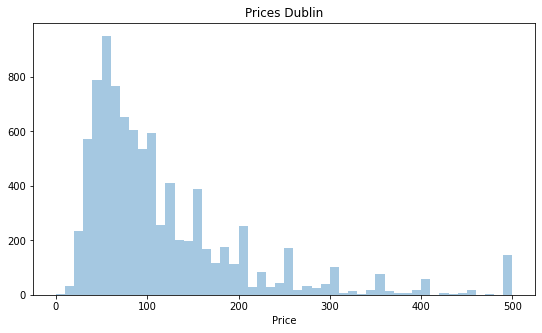

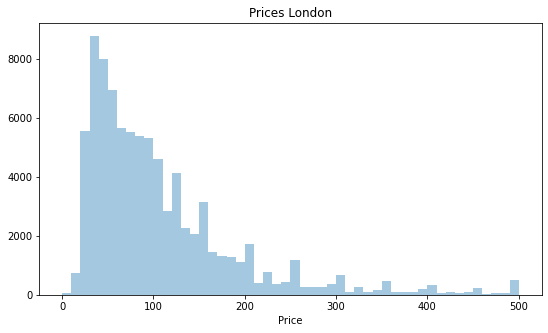

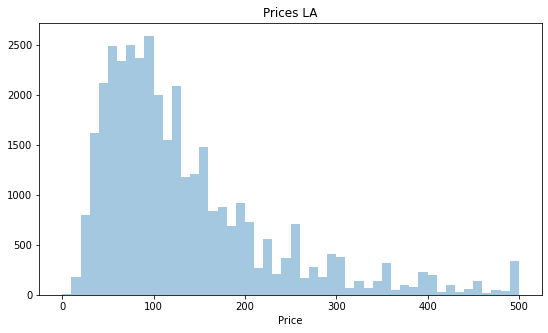

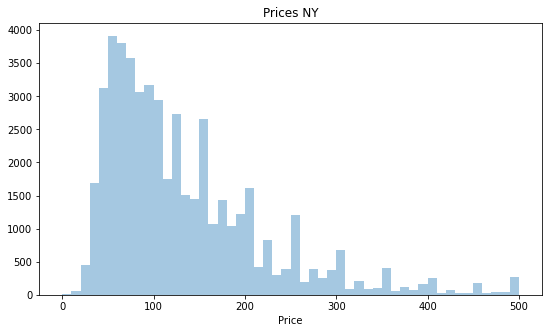

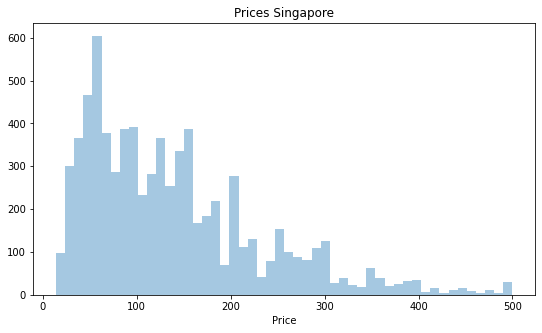

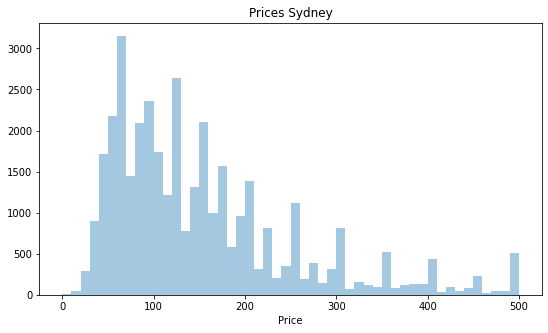

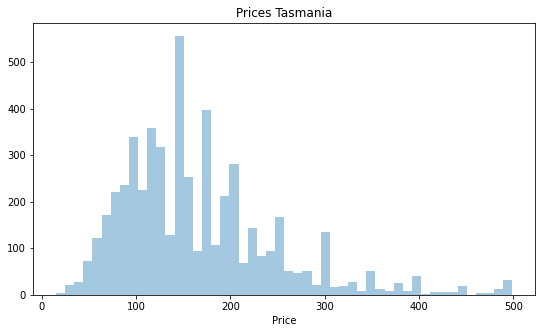

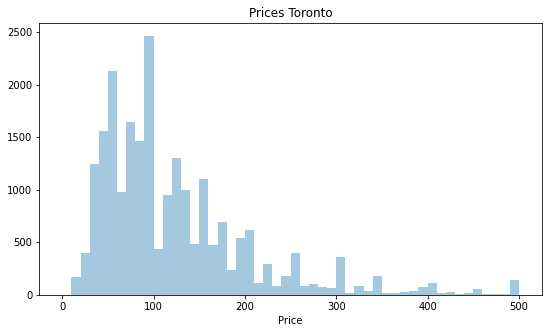

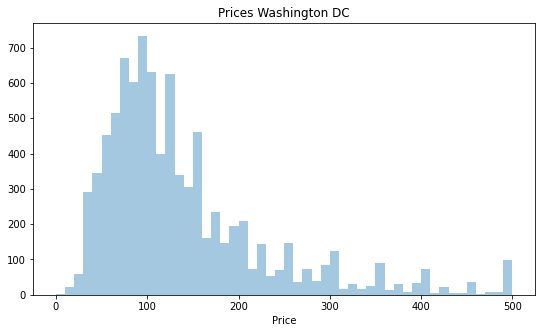

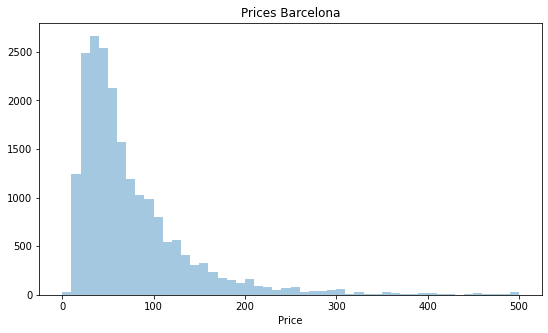

In [ ]:
def plotcity(city):
  temp = df[df['city'] == city]
  plt.figure()
  temp['price'].plot(kind='hist',bins=50, alpha=0.4, figsize=(9,5))
  plt.title('Prices '+str(city))
  plt.xlabel('Price')
  plt.ylabel('')

for city in cities:
    plotcity(city)

plt.show()

In [ ]:
print(df['bedrooms'].describe())
print('\n')
print('NAs:', df['bedrooms'].isna().sum())

count    294514.000000
mean          1.357939
std           0.875947
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          46.000000
Name: bedrooms, dtype: float64


NAs: 0


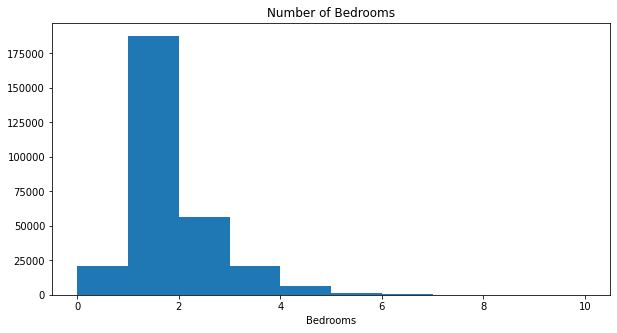

In [ ]:
bedrooms = df[df['bedrooms']<=10]
plt.figure(figsize=(10,5))
bedrooms['bedrooms'].plot(kind='hist',bins=10)
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('')
plt.show()

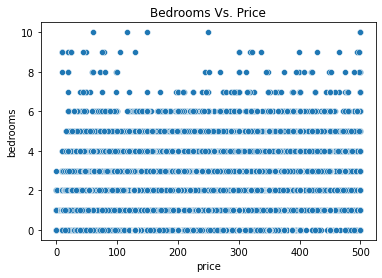

In [ ]:
sns.scatterplot(x='price',y='bedrooms',data=df[df['bedrooms']<=10])
plt.title('Bedrooms Vs. Price')
plt.show()

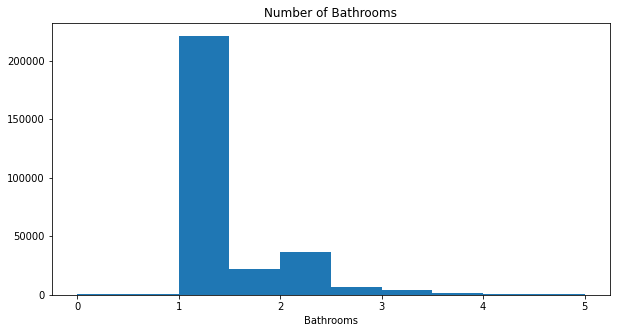

In [ ]:
bathrooms = df[df['bathrooms']<=5]
plt.figure(figsize=(10,5))
bathrooms['bathrooms'].plot(kind='hist',bins=10)
plt.title('Number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('')
plt.show()

Manhattan        21562
Brooklyn         20217
Queens            6219
Bronx             1240
Staten Island      371
Name: neighbourhood_group_cleansed, dtype: int64


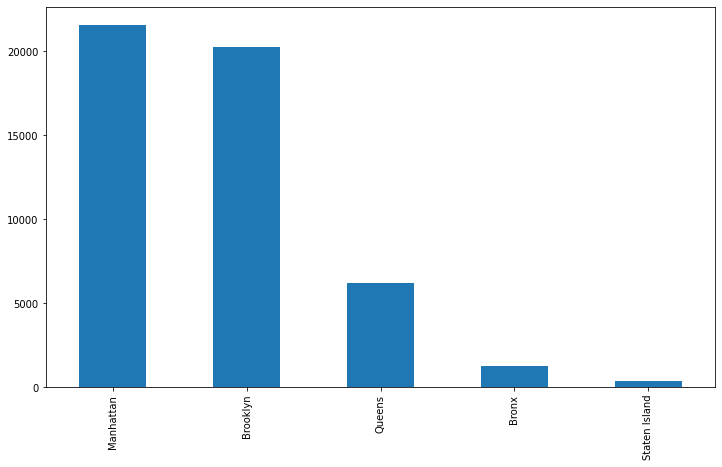

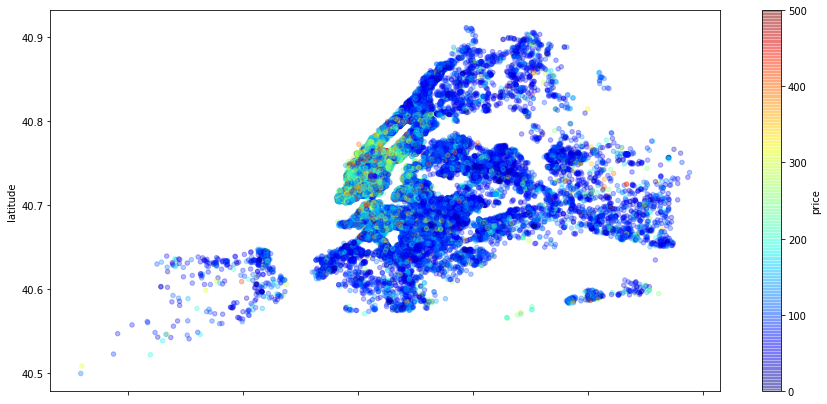

In [ ]:
df_ny = df[df['city']=='NY']
print(df_ny['neighbourhood_group_cleansed'].value_counts())
df_ny['neighbourhood_group_cleansed'].value_counts().plot.bar(figsize=(12,7))
df_ny.plot(kind='scatter', x='longitude',y='latitude',alpha=0.3,c='price', cmap=plt.get_cmap('jet'), colorbar=True,figsize=(15,7))
plt.show()

Westminster               9553
Tower Hamlets             8471
Hackney                   6294
Camden                    6149
Kensington and Chelsea    5782
Islington                 5047
Lambeth                   4935
Southwark                 4933
Wandsworth                4196
Hammersmith and Fulham    4170
Name: neighbourhood_cleansed, dtype: int64


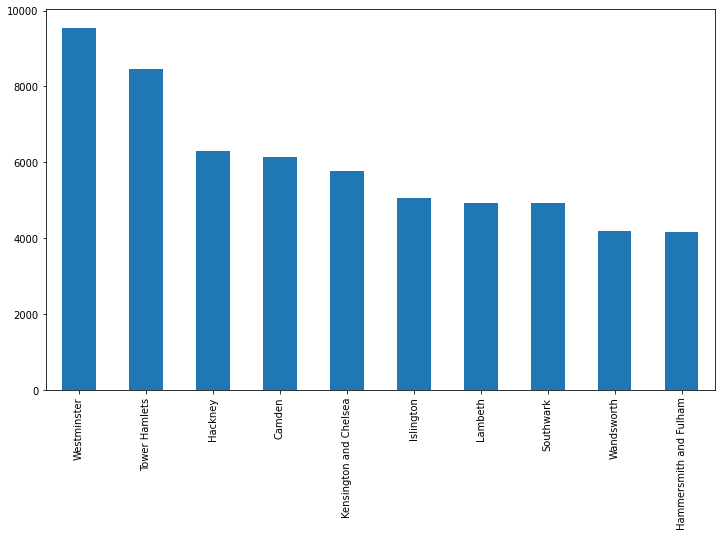

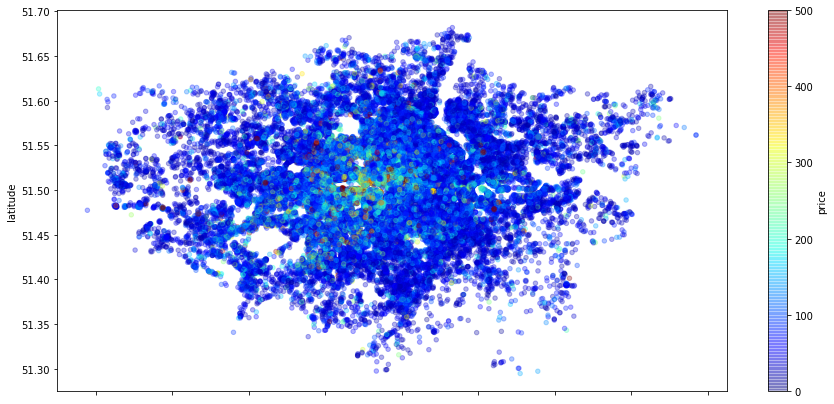

In [ ]:
df_london = df[df['city']=='London']
print(df_london['neighbourhood_cleansed'].value_counts().head(10))
df_london['neighbourhood_cleansed'].value_counts().head(10).plot.bar(figsize=(12,7))
df_london.plot(kind='scatter', x='longitude',y='latitude',alpha=0.3,c='price', cmap=plt.get_cmap('jet'), colorbar=True,figsize=(15,7))
plt.show()

West Town          984
Near North Side    851
Lake View          674
Logan Square       552
Loop               503
Near West Side     450
Lincoln Park       416
Lower West Side    257
Uptown             253
Edgewater          227
Name: neighbourhood_cleansed, dtype: int64


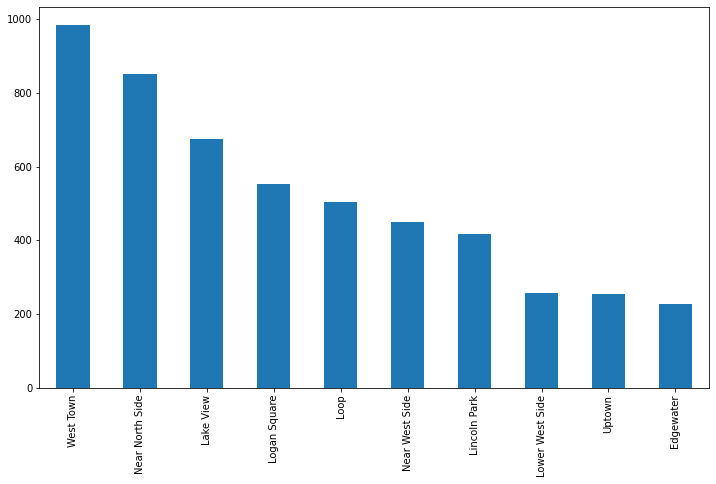

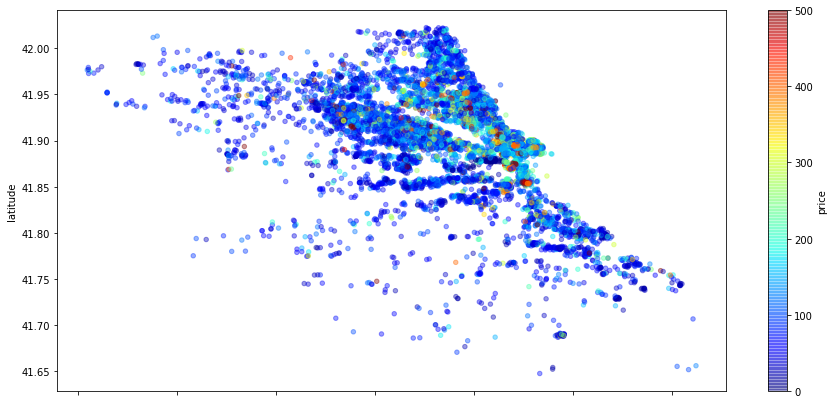

In [ ]:
df_chi = df[df['city']== 'Chicago']
print(df_chi['neighbourhood_cleansed'].value_counts().head(10))
df_chi['neighbourhood_cleansed'].value_counts().head(10).plot.bar(figsize=(12,7))
df_chi.plot(kind='scatter', x='longitude',y='latitude',alpha=0.4,c='price', cmap=plt.get_cmap('jet'), colorbar=True,figsize=(15,7))
plt.show()

Hobart                  1228
Launceston               538
Glamorgan/Spring Bay     428
Clarence                 360
Kingborough              344
Break O'Day              316
Huon Valley              167
West Tamar               156
Dorset                   145
Kentish                  141
Name: neighbourhood_cleansed, dtype: int64


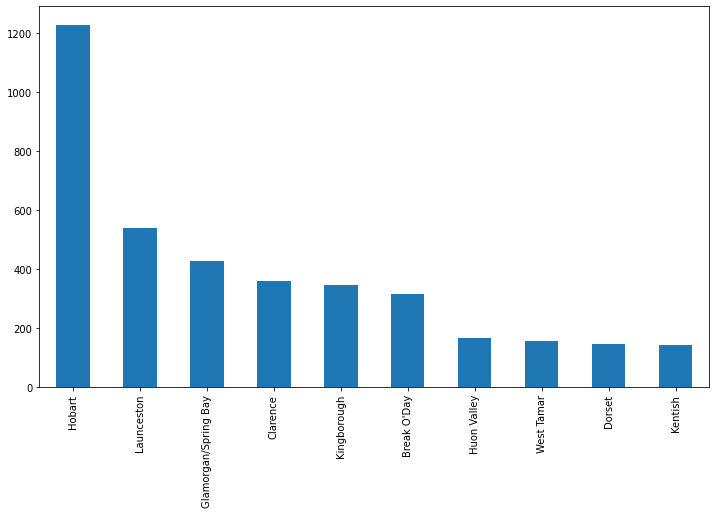

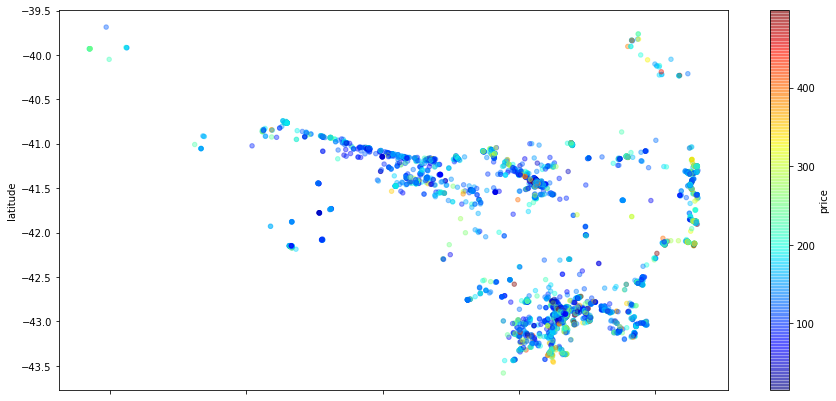

In [ ]:
df_tas = df[df['city']== 'Tasmania']
print(df_tas['neighbourhood_cleansed'].value_counts().head(10))
df_tas['neighbourhood_cleansed'].value_counts().head(10).plot.bar(figsize=(12,7))
df_tas.plot(kind='scatter', x='longitude',y='latitude',alpha=0.4,c='price', cmap=plt.get_cmap('jet'), colorbar=True,figsize=(15,7))
plt.show()

Central Region       6076
West Region           497
East Region           439
North-East Region     301
North Region          197
Name: neighbourhood_group_cleansed, dtype: int64


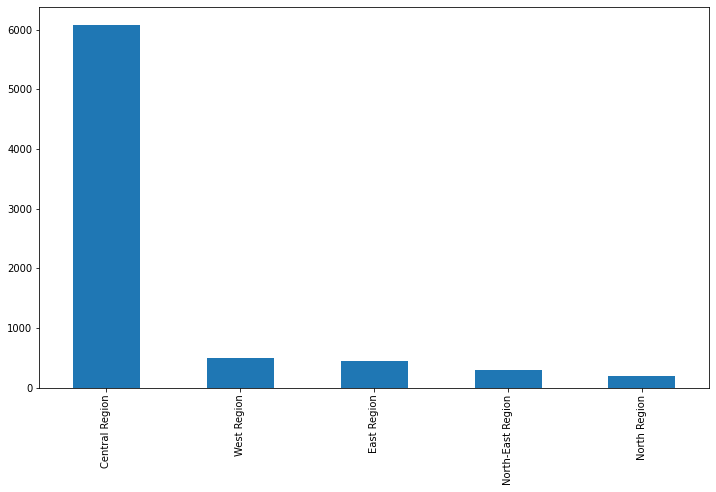

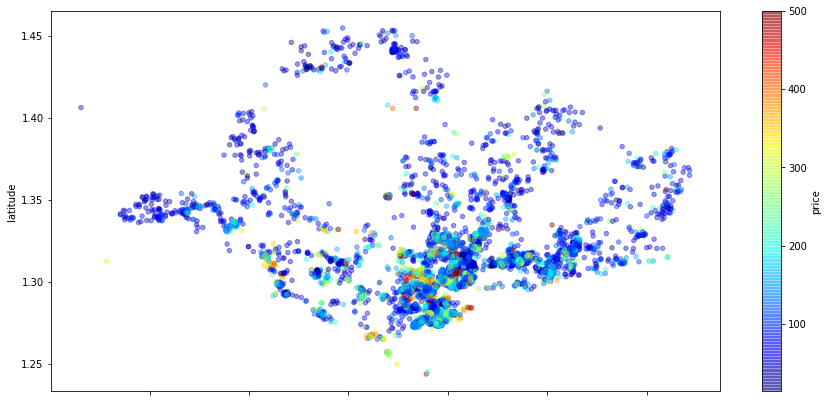

In [ ]:
df_sin = df[df['city']== 'Singapore']
print(df_sin['neighbourhood_group_cleansed'].value_counts())
df_sin['neighbourhood_group_cleansed'].value_counts().plot.bar(figsize=(12,7))
df_sin.plot(kind='scatter', x='longitude',y='latitude',alpha=0.4,c='price', cmap=plt.get_cmap('jet'), colorbar=True,figsize=(15,7))
plt.show()

Eixample               6949
Ciutat Vella           4793
Sants-Montjuïc         2351
Sant Martí             2085
Gràcia                 1764
Sarrià-Sant Gervasi     838
Horta-Guinardó          658
Les Corts               443
Sant Andreu             334
Nou Barris              284
Name: neighbourhood_group_cleansed, dtype: int64


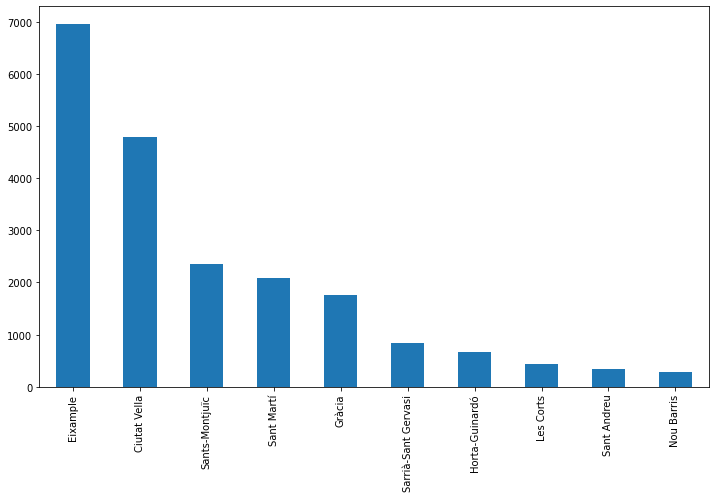

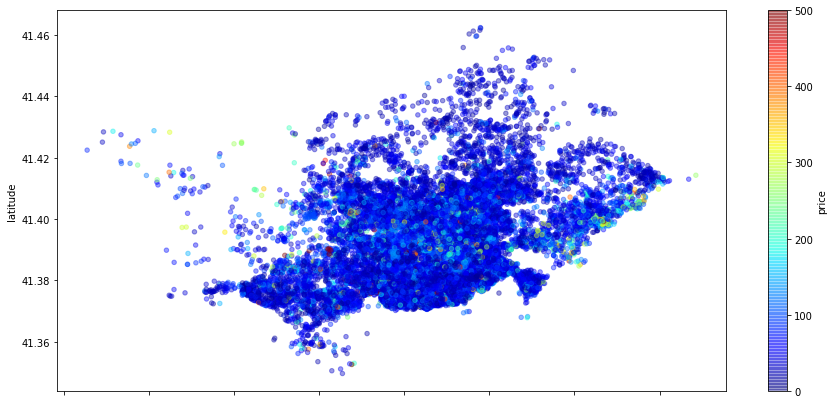

In [ ]:
df_bcn = df[df['city']== 'Barcelona']
print(df_bcn['neighbourhood_group_cleansed'].value_counts())
df_bcn['neighbourhood_group_cleansed'].value_counts().plot.bar(figsize=(12,7))
df_bcn.plot(kind='scatter', x='longitude',y='latitude',alpha=0.4,c='price', cmap=plt.get_cmap('jet'), colorbar=True,figsize=(15,7))
plt.show()

In [ ]:
df['host_id'].value_counts().head(10)

107434423    1069
48005494      576
33889201      544
12243051      471
66406177      342
219517861     295
30283594      259
13557337      245
28820321      243
8534462       231
Name: host_id, dtype: int64

In [ ]:
super_host = df[df['host_id']== 107434423]
super_host['city'].value_counts()

NY               302
Chicago          227
LA               210
Washington DC    177
Boston           153
Name: city, dtype: int64

In [ ]:
super_host2 = df[df['host_id']== 33889201]
super_host2['city'].value_counts()

London    544
Name: city, dtype: int64

In [ ]:
super_host3 = df[df['host_id']== 48005494]
super_host3['city'].value_counts()

Washington DC    236
LA               225
NY               103
Boston            12
Name: city, dtype: int64

In [ ]:
df_bcn['host_id'].value_counts().head(10)

4459553      169
193618270    127
158023606    119
1447144      115
36607755      98
265193861     96
396363        92
1391607       91
157250994     83
171236207     82
Name: host_id, dtype: int64

In [ ]:
super_host_bcn = df[df['host_id']== 4459553]
super_host_bcn['city'].value_counts()

Barcelona    169
Name: city, dtype: int64

In [ ]:
availability = df['availability_365']

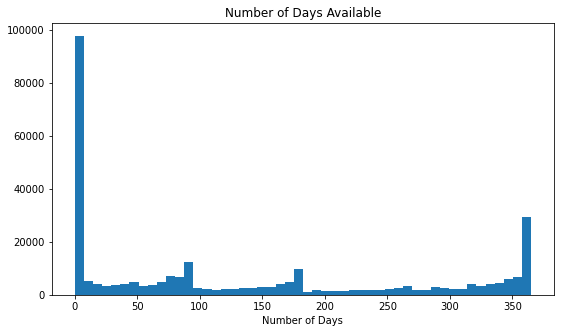

In [ ]:
availability.plot(kind='hist', bins=50, figsize=(9,5))
plt.title('Number of Days Available')
plt.xlabel('Number of Days')
plt.ylabel('')
plt.show()

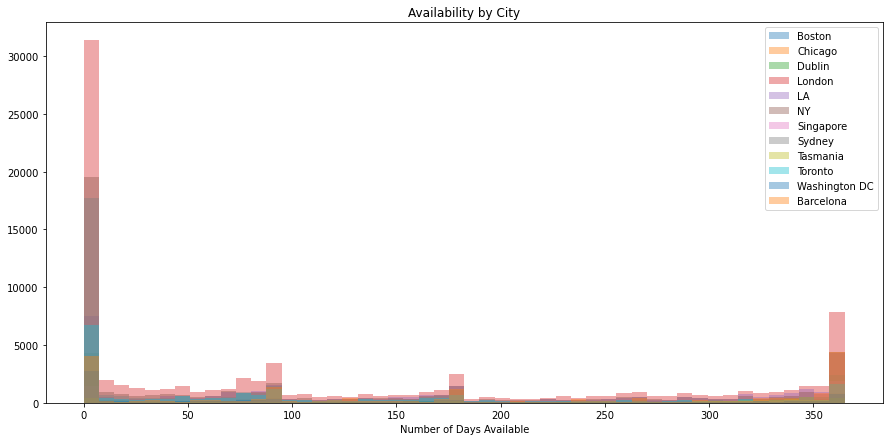

In [ ]:
def plotavai_one(city):
  temp = df[df['city'] == city]
  #plt.figure()
  temp['availability_365'].plot(kind='hist',bins=50, alpha=0.4, figsize=(15,7))
  plt.title('Availability by City')
  plt.xlabel('Number of Days Available')
  plt.ylabel('')

for city in cities:
    plotavai_one(city)

plt.legend(cities)
plt.show()

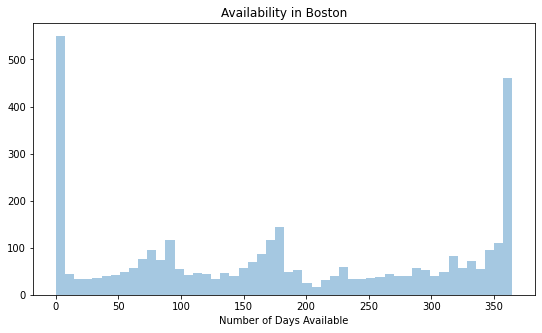

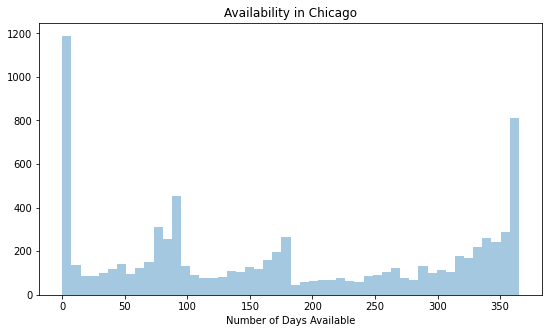

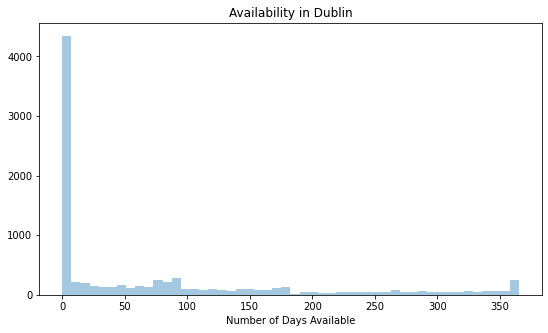

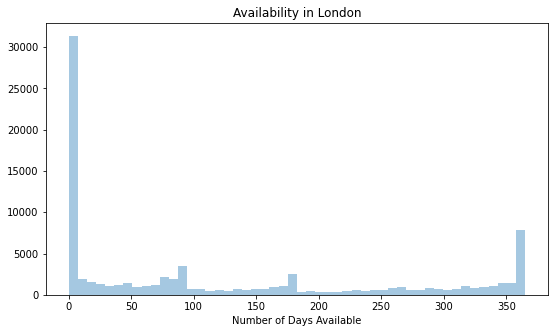

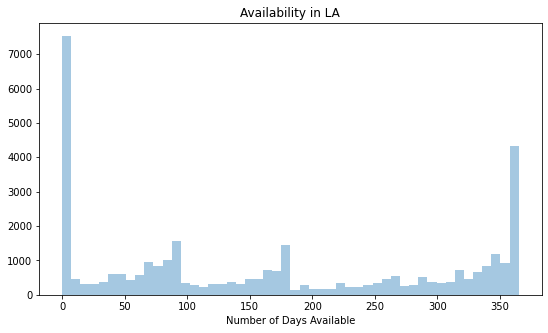

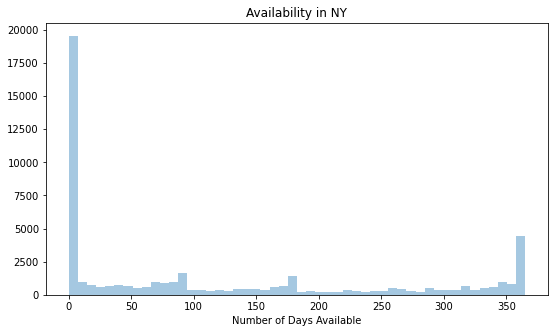

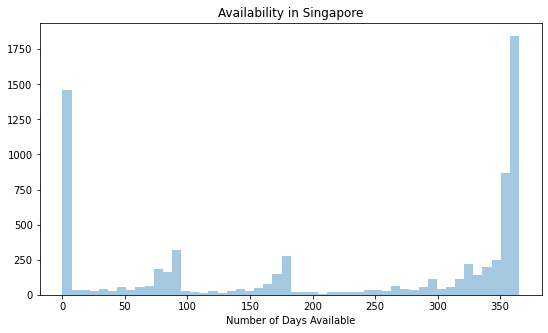

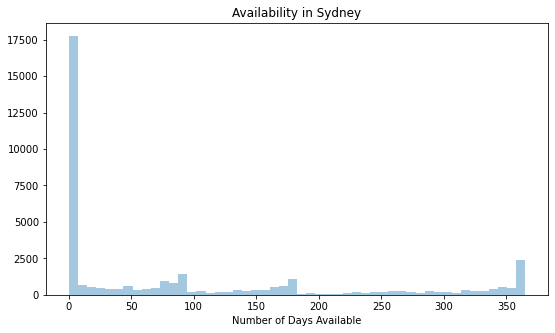

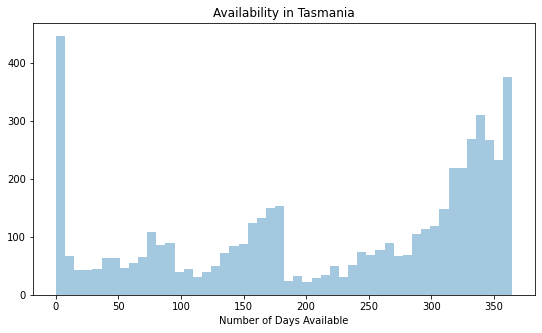

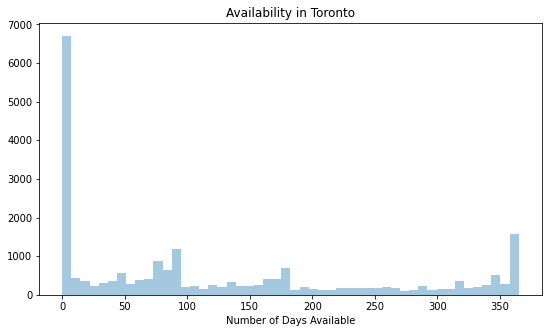

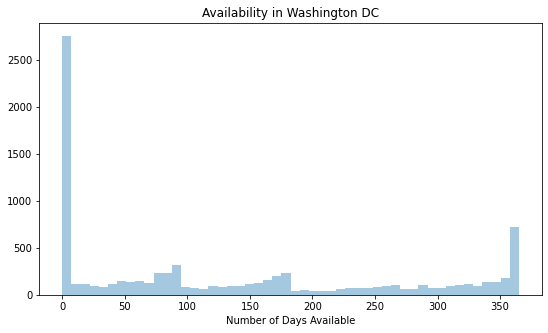

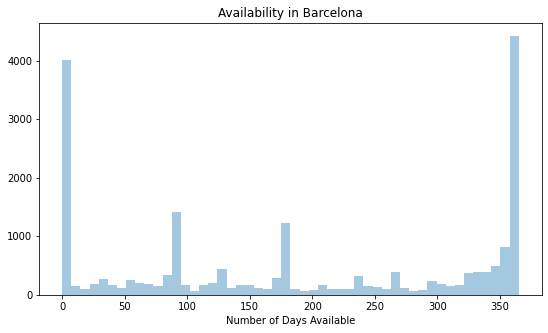

In [ ]:
def plotavai(city):
  temp = df[df['city'] == city]
  plt.figure()
  temp['availability_365'].plot(kind='hist',bins=50, alpha=0.4, figsize=(9,5))
  plt.title('Availability in '+str(city))
  plt.xlabel('Number of Days Available')
  plt.ylabel('')

for city in cities:
    plotavai(city)

plt.show()

In [ ]:
df_bcn['neighbourhood_group_cleansed'].value_counts()

Eixample               6949
Ciutat Vella           4793
Sants-Montjuïc         2351
Sant Martí             2085
Gràcia                 1764
Sarrià-Sant Gervasi     838
Horta-Guinardó          658
Les Corts               443
Sant Andreu             334
Nou Barris              284
Name: neighbourhood_group_cleansed, dtype: int64

In [ ]:
top_neis = []
for city in cities:
  temp = df[df['city']==city]
  temp2 = temp['neighbourhood_cleansed'].value_counts().reset_index().head(5)
  temp2['city'] = city
  top_neis.append(temp2)

In [ ]:
top_neis_df = pd.concat(top_neis)

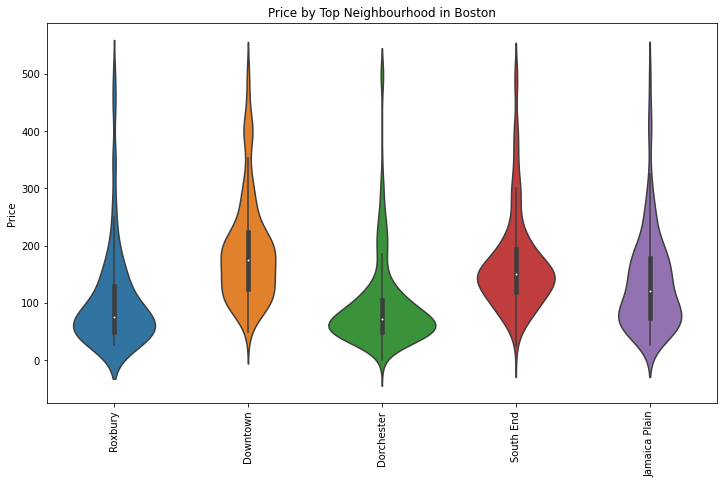

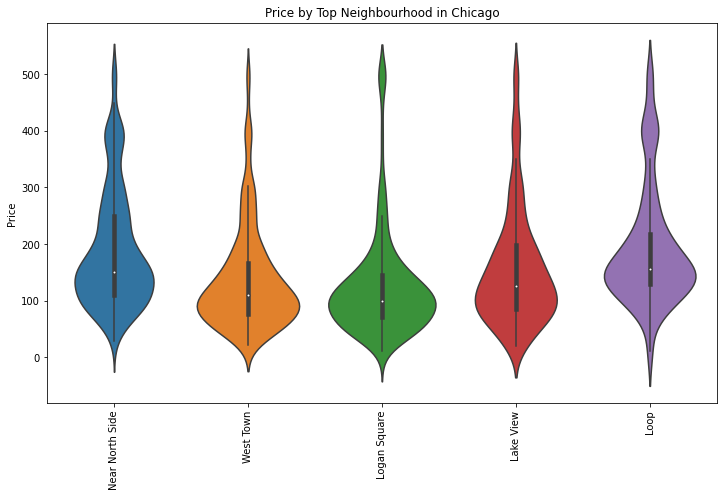

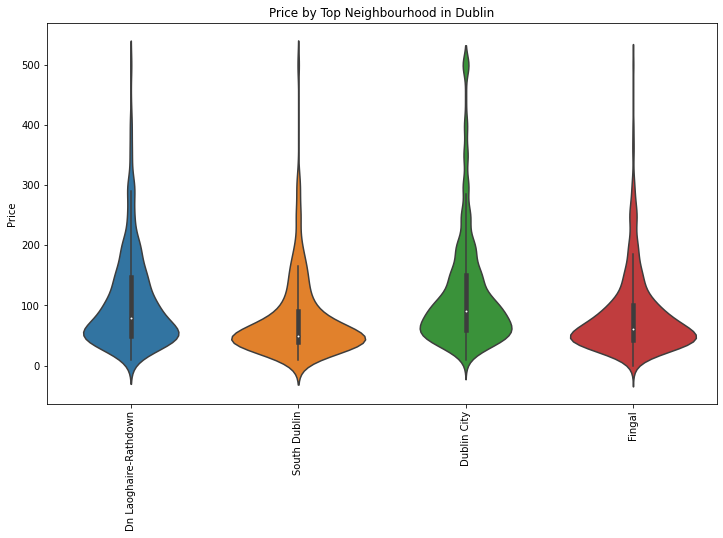

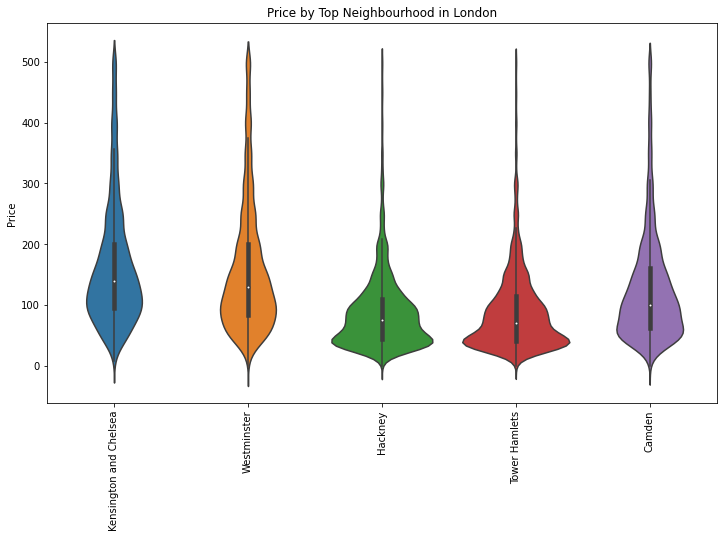

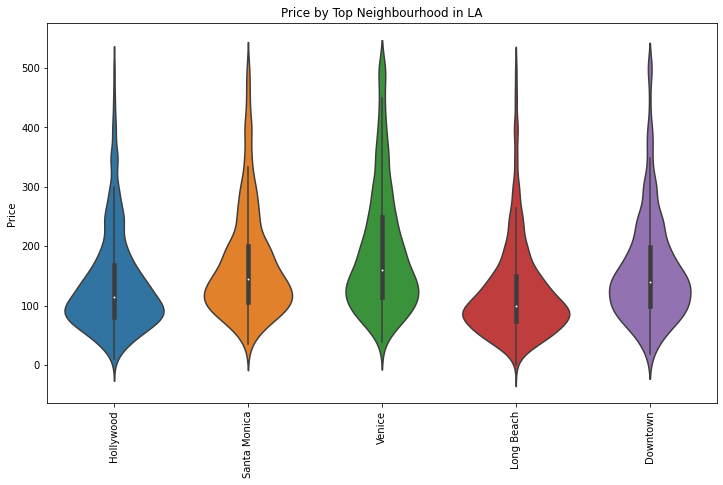

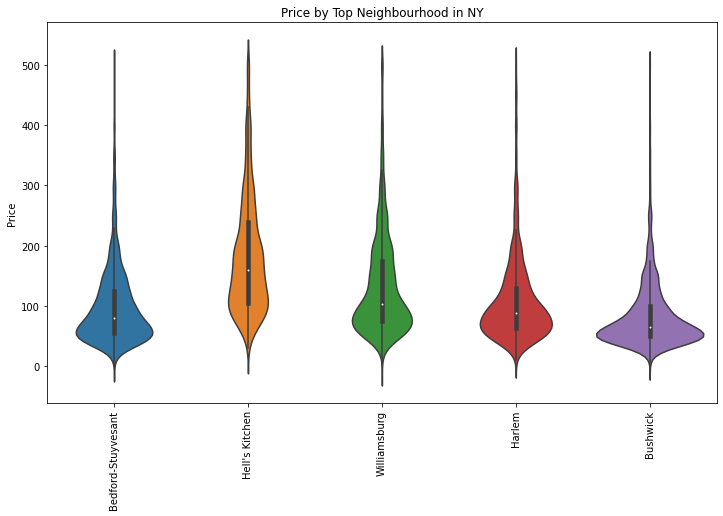

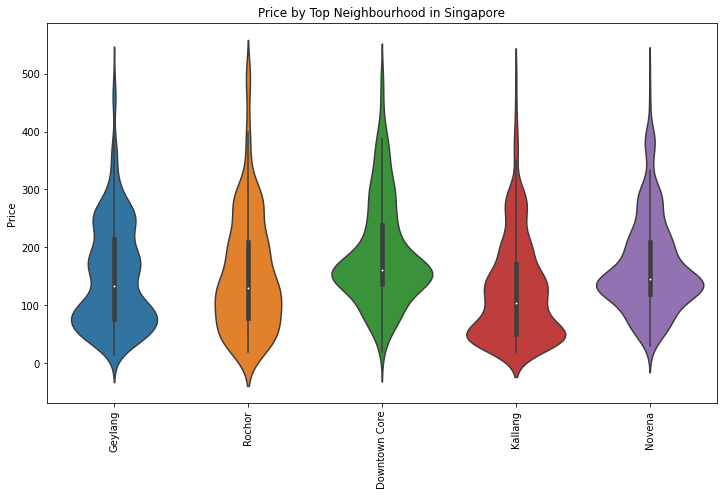

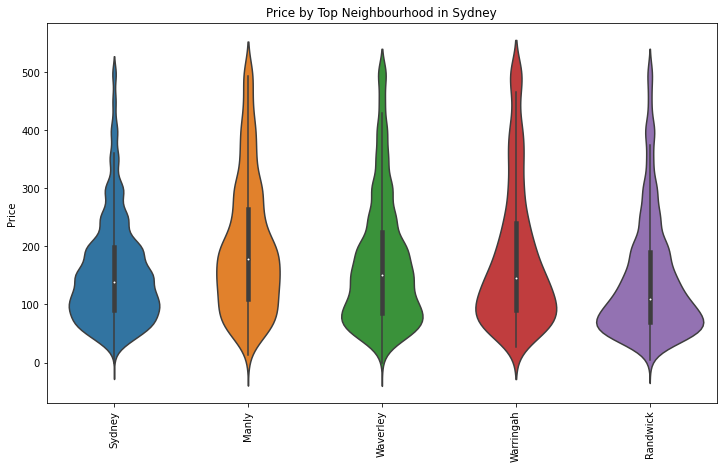

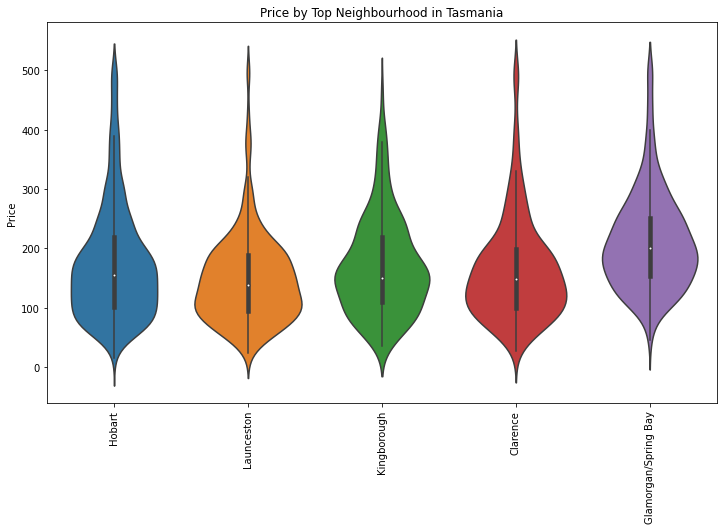

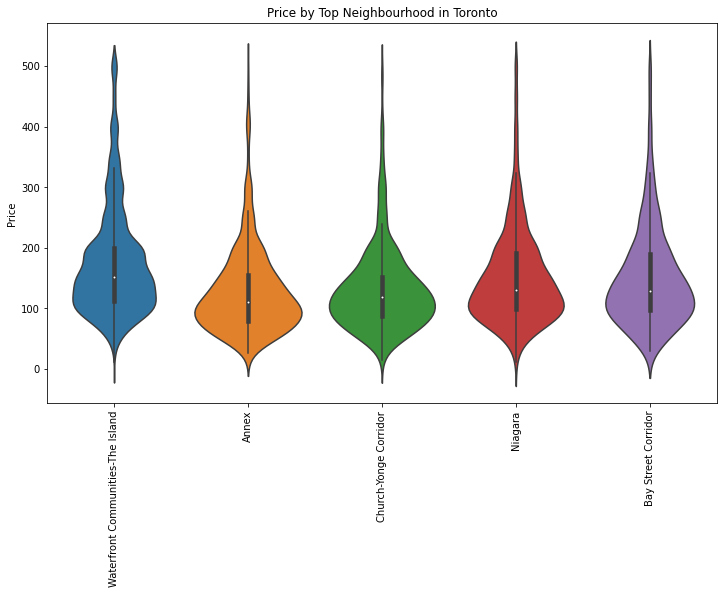

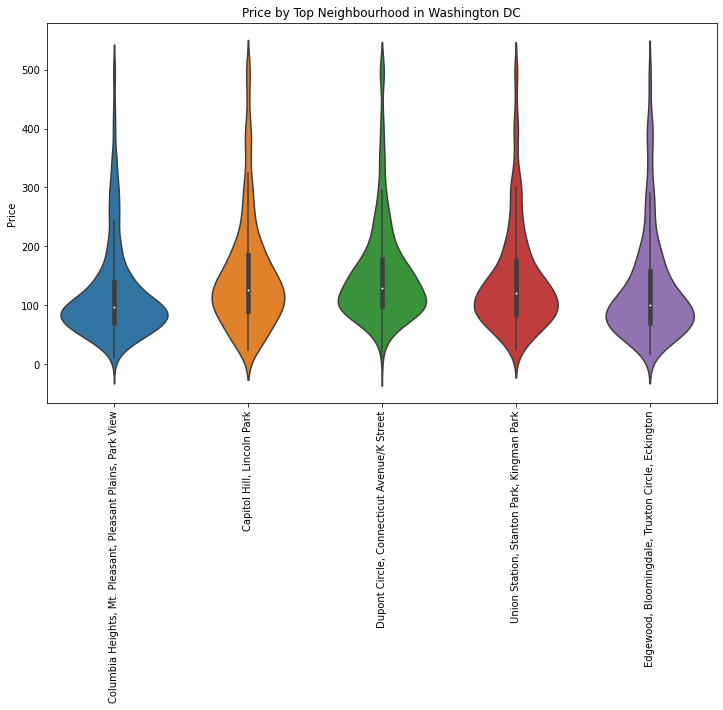

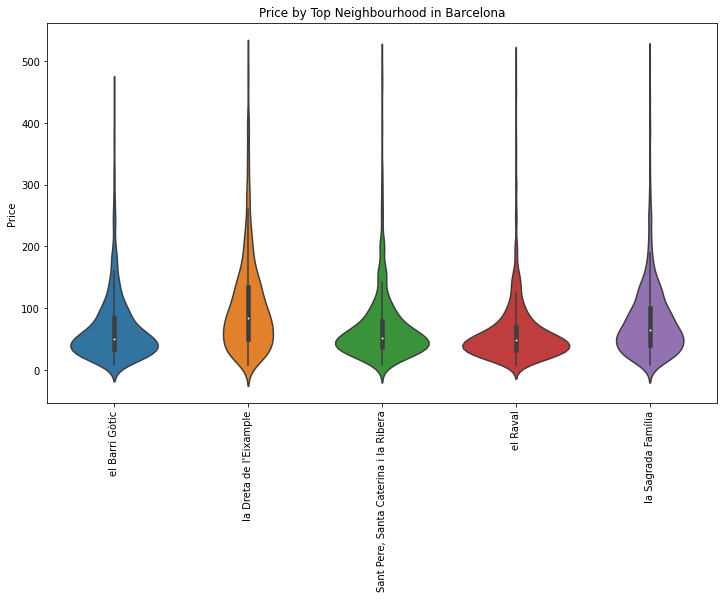

In [ ]:
def plotviolin(city):
  temp = df[df['city'] == city]
  top_nei = top_neis_df[top_neis_df['city']== city]
  temp2 = temp[temp['neighbourhood_cleansed'].isin(top_nei['index'])]
  plt.figure(figsize=(12,7))
  plot = sns.violinplot(data=temp2,x='neighbourhood_cleansed',y='price')
  plt.title('Price by Top Neighbourhood in '+str(city))
  plt.xlabel('')
  plt.ylabel('Price')
  plt.setp(plot.get_xticklabels(), rotation=90)

for city in cities:
    plotviolin(city)

plt.show()

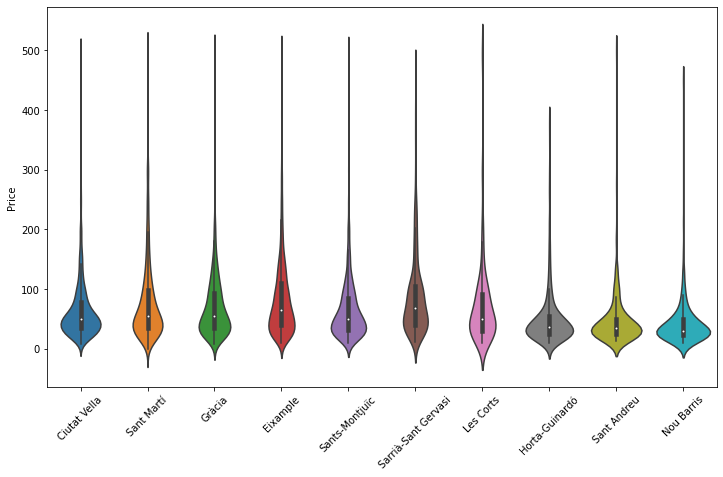

In [ ]:
plt.figure(figsize=(12,7))
plot = sns.violinplot(data=df_bcn,x='neighbourhood_group_cleansed',y='price')
plt.xlabel('')
plt.ylabel('Price')
plt.setp(plot.get_xticklabels(), rotation=45)
plt.show()

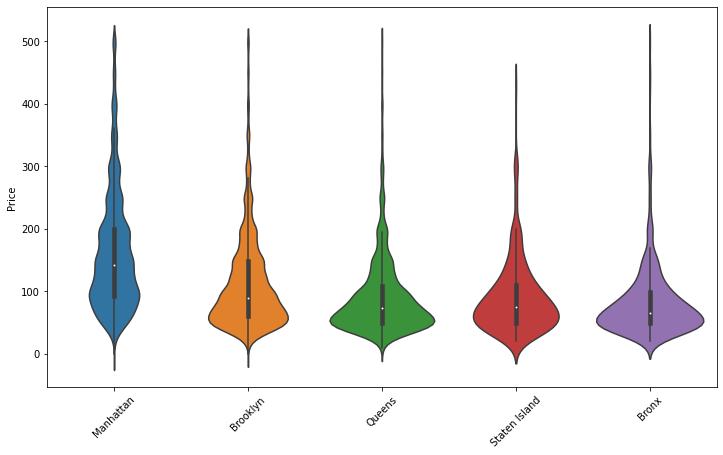

In [ ]:
plt.figure(figsize=(12,7))
plot = sns.violinplot(data=df_ny,x='neighbourhood_group_cleansed',y='price')
plt.xlabel('')
plt.ylabel('Price')
plt.setp(plot.get_xticklabels(), rotation=45)
plt.show()

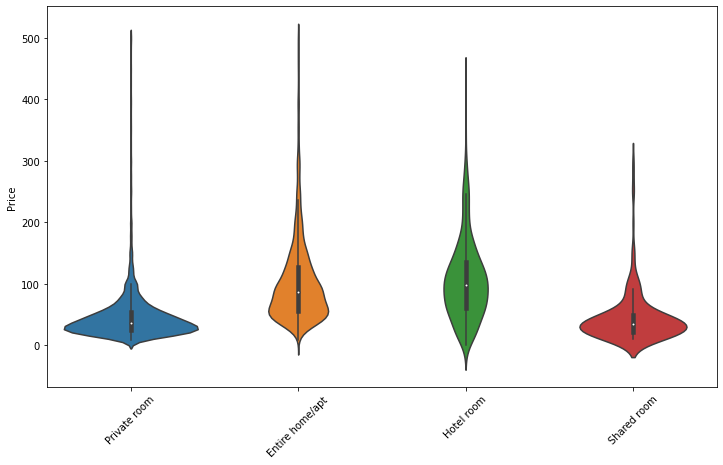

In [ ]:
plt.figure(figsize=(12,7))
plot = sns.violinplot(data=df_bcn,x='room_type',y='price')
plt.xlabel('')
plt.ylabel('Price')
plt.setp(plot.get_xticklabels(), rotation=45)
plt.show()

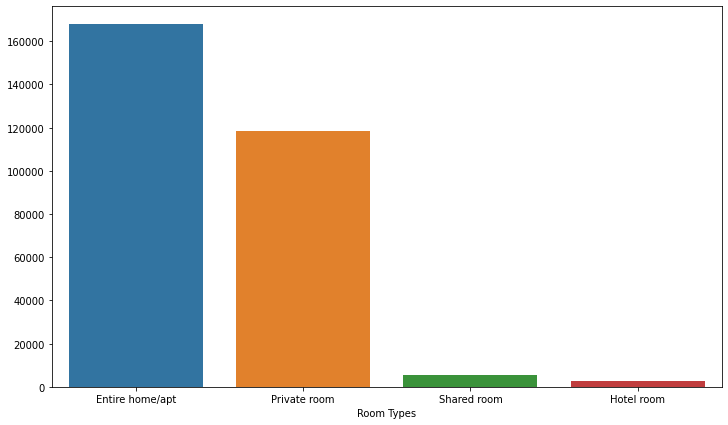

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(data=df, x='room_type')
plt.xlabel('Room Types')
plt.ylabel('')
plt.show()

<Figure size 864x504 with 0 Axes>

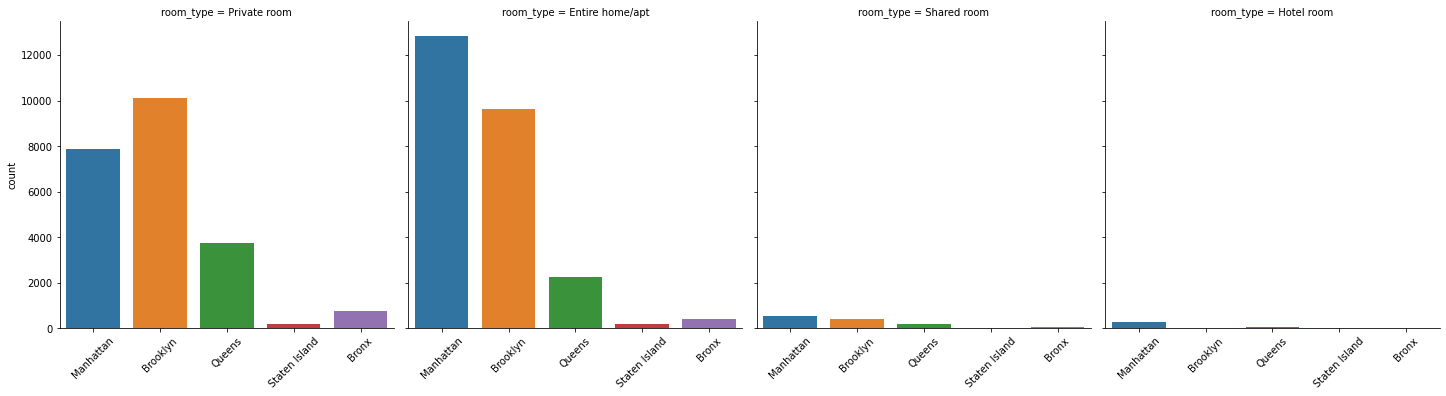

In [ ]:
plt.figure(figsize=(12,7))
plot = sns.catplot(x='neighbourhood_group_cleansed',
            col='room_type', data=df_ny, kind='count')
plt.xlabel('')
plt.ylabel('')
plot.set_xticklabels(rotation=45)
plot.set(xlabel=None)
plt.show()

<Figure size 864x504 with 0 Axes>

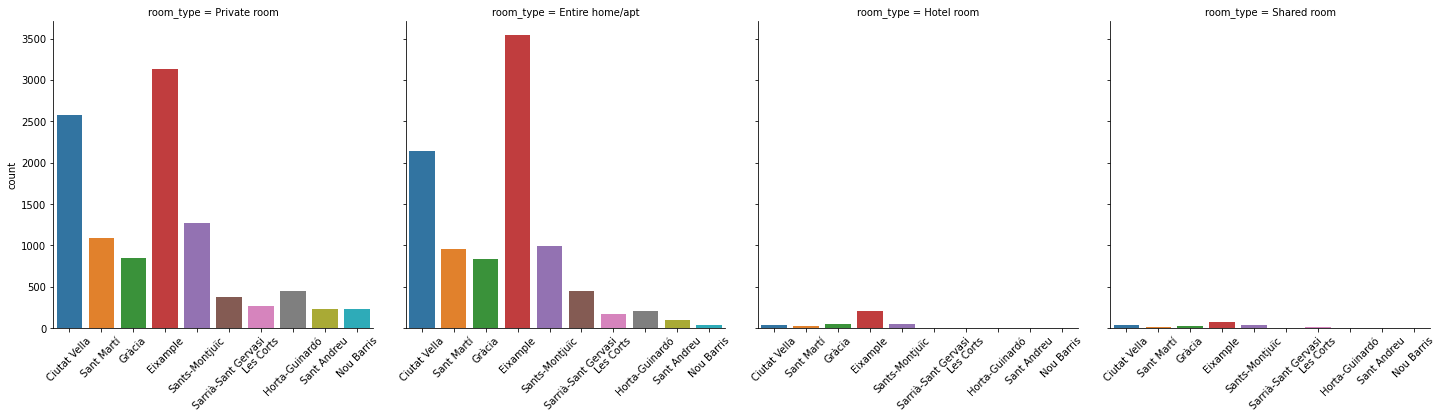

In [ ]:
plt.figure(figsize=(12,7))
plot = sns.catplot(x='neighbourhood_group_cleansed',
            col='room_type', data=df_bcn, kind='count')
plt.xlabel('')
plt.ylabel('')
plot.set_xticklabels(rotation=45)
plot.set(xlabel=None)
plt.show()

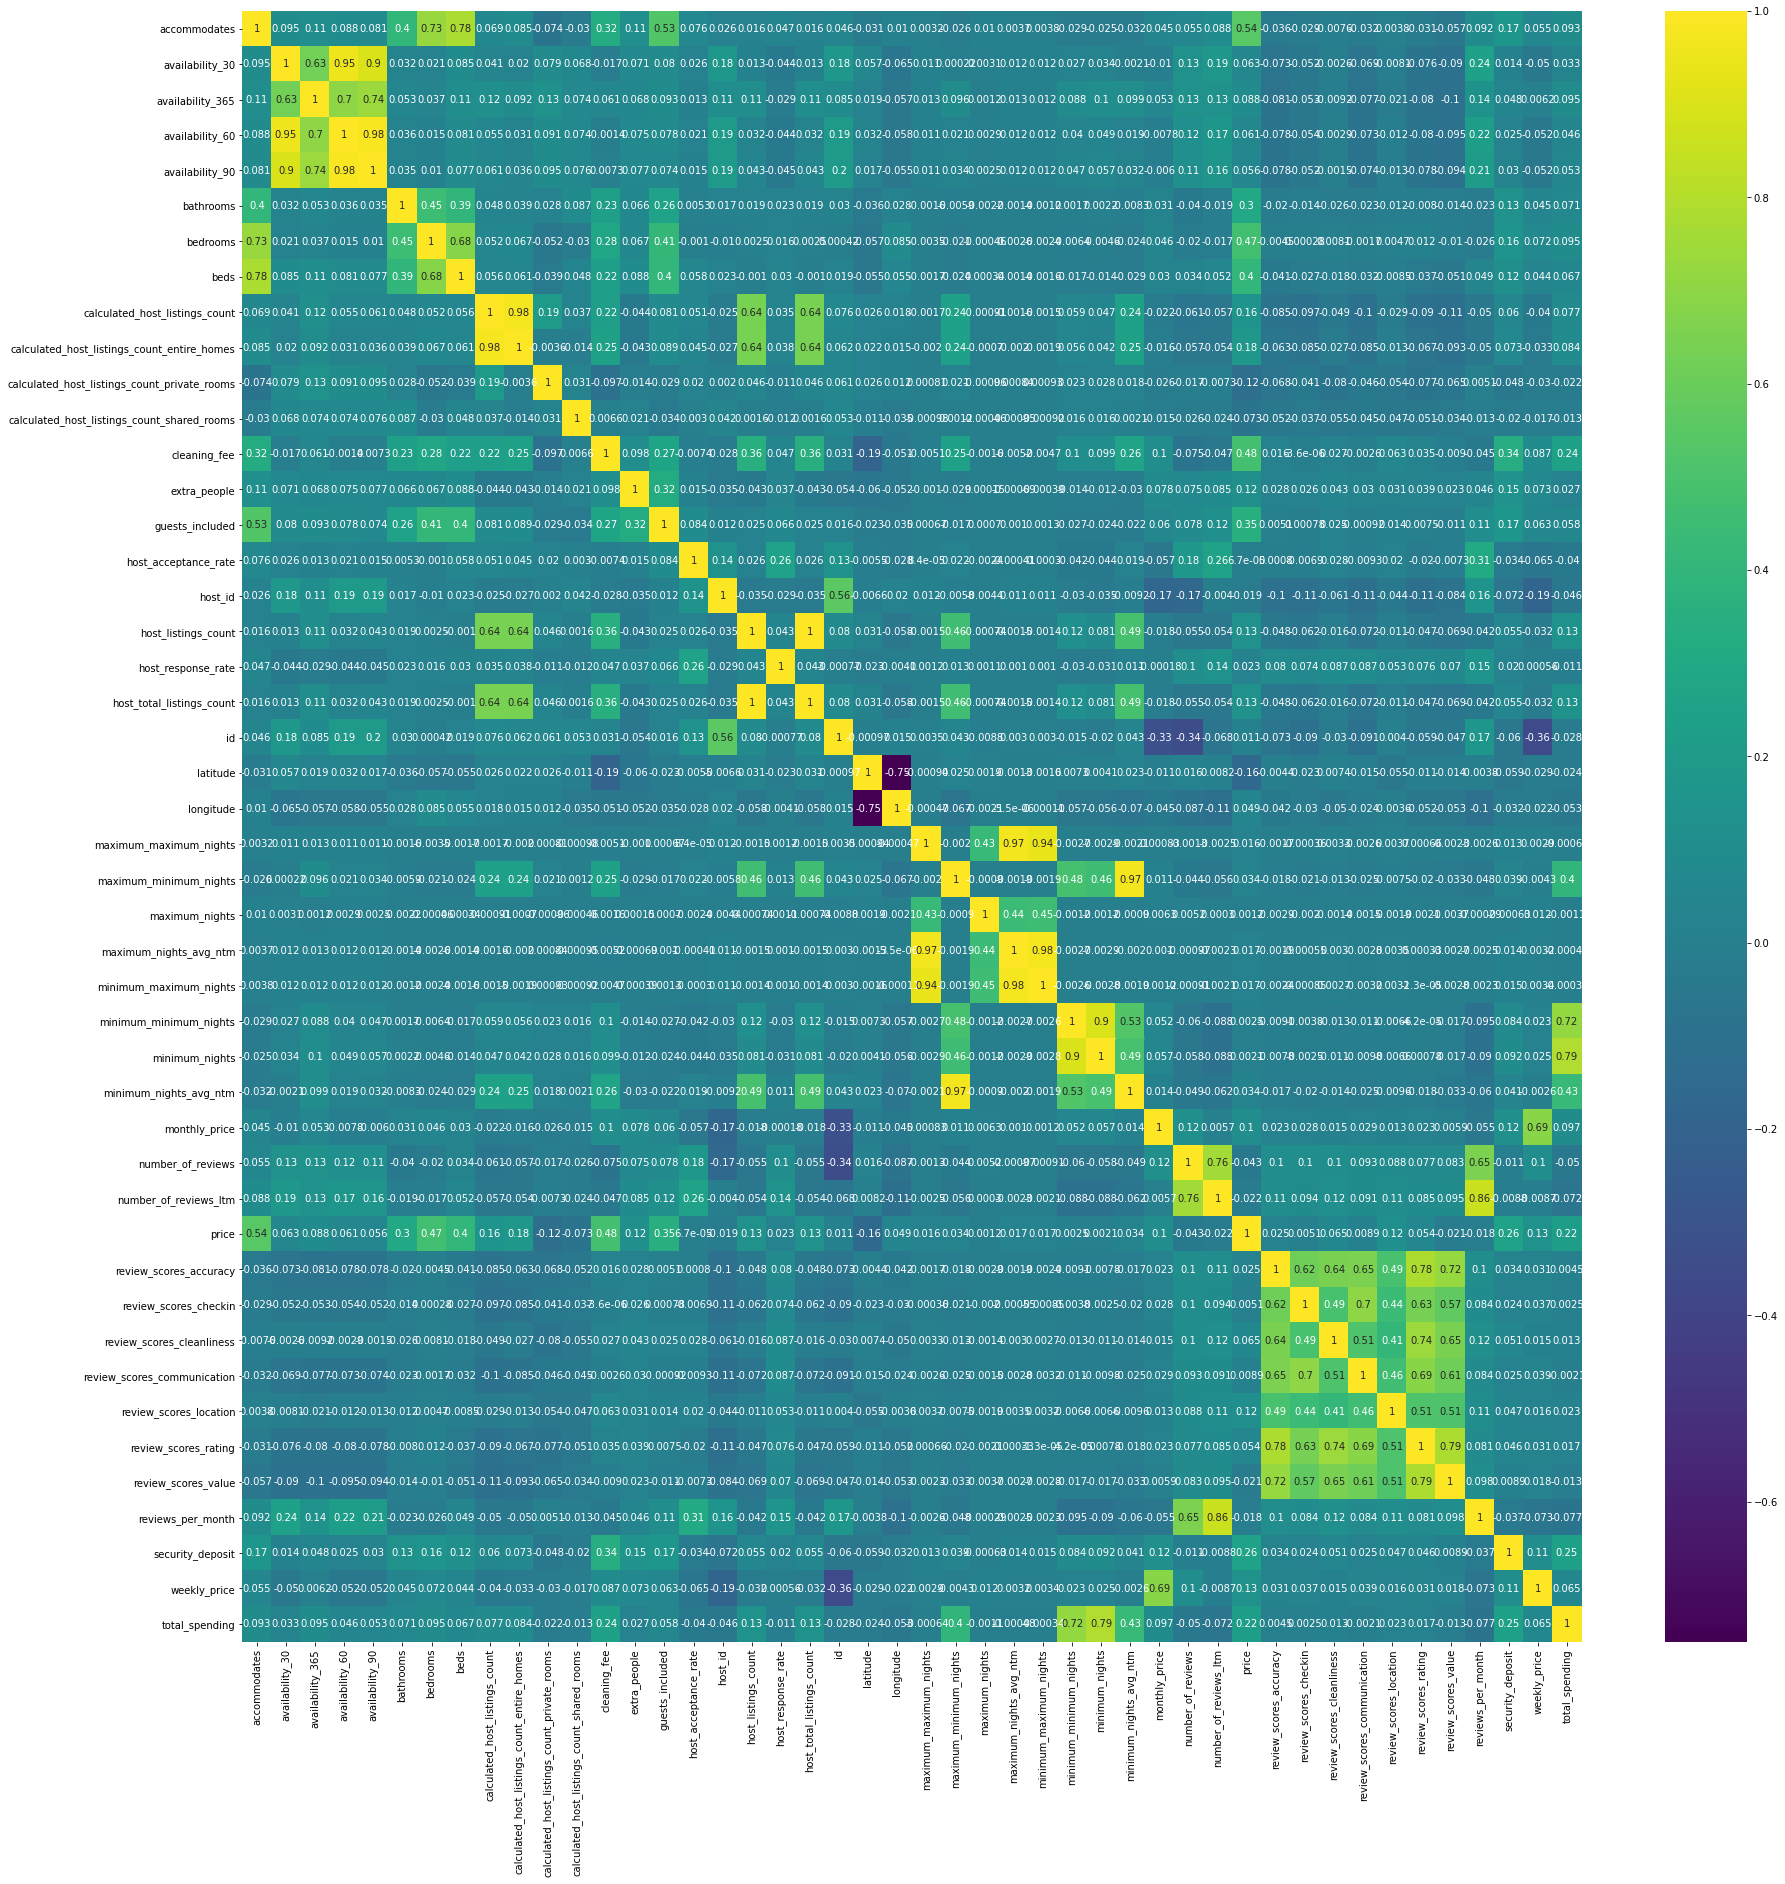

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(df.select_dtypes(include =['int','float']).corr(), annot=True, cmap='viridis')
plt.show()

In [ ]:
  df.select_dtypes(include =['int','float']).corr()['total_spending'].sort_values(ascending=False)

total_spending                                  1.000000
minimum_nights                                  0.789943
minimum_minimum_nights                          0.715164
minimum_nights_avg_ntm                          0.425792
maximum_minimum_nights                          0.396623
security_deposit                                0.251787
cleaning_fee                                    0.244192
price                                           0.216817
host_listings_count                             0.131909
host_total_listings_count                       0.131909
monthly_price                                   0.097093
availability_365                                0.095124
bedrooms                                        0.094548
accommodates                                    0.092623
calculated_host_listings_count_entire_homes     0.084207
calculated_host_listings_count                  0.077383
bathrooms                                       0.071188
beds                           

In [ ]:
  df.select_dtypes(include =['int','float']).corr()['price'].sort_values(ascending=False)

price                                           1.000000
accommodates                                    0.543597
cleaning_fee                                    0.475301
bedrooms                                        0.469228
beds                                            0.402167
guests_included                                 0.353836
bathrooms                                       0.302227
security_deposit                                0.256432
total_spending                                  0.216817
calculated_host_listings_count_entire_homes     0.184816
calculated_host_listings_count                  0.157195
weekly_price                                    0.128878
host_total_listings_count                       0.125368
host_listings_count                             0.125368
extra_people                                    0.120963
review_scores_location                          0.117365
monthly_price                                   0.102696
availability_365               

#Pre-Process

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import random
import string
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
random.seed(42)
df_shuffled = shuffle(df)
df_shuffled['city'].head()

291619    Barcelona
108884       London
80450        London
201809    Singapore
4483        Chicago
Name: city, dtype: object

In [ ]:
one_nei = df['neighbourhood_cleansed'].value_counts().tail(16)
one_nei_list = list(one_nei.index)

In [ ]:
for i in one_nei_list:
  temp = df['neighbourhood_cleansed'] == i
  temp2 = temp[temp].index.values
  df.drop(temp2, axis=0,inplace=True)

In [ ]:
df['neighbourhood_cleansed'].value_counts()

Sydney              10123
Westminster          9553
Tower Hamlets        8471
Dublin City          6904
Hackney              6294
                    ...  
Val Verde               2
Burnside                2
Leather District        2
Hasley Canyon           2
East Compton            2
Name: neighbourhood_cleansed, Length: 950, dtype: int64

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [ ]:
for train_index, test_index in split.split(df, df['neighbourhood_cleansed']):
  train_set = df.iloc[train_index]
  test_set = df.iloc[test_index]

In [ ]:
print(train_set.shape)
print(test_set.shape)

(235595, 103)
(58899, 103)


Train

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df_cat_train = train_set.select_dtypes(exclude=['int', 'float'])

In [ ]:
df_cat_train.columns

Index(['access', 'amenities', 'bathrooms_text', 'bed_type',
       'calendar_last_scraped', 'calendar_updated', 'cancellation_policy',
       'city', 'country', 'country_code', 'description', 'experiences_offered',
       'first_review', 'has_availability', 'host_about',
       'host_has_profile_pic', 'host_identity_verified', 'host_is_superhost',
       'host_location', 'host_name', 'host_neighbourhood', 'host_picture_url',
       'host_response_time', 'host_since', 'host_thumbnail_url', 'host_url',
       'host_verifications', 'house_rules', 'instant_bookable', 'interaction',
       'is_business_travel_ready', 'is_location_exact', 'jurisdiction_names',
       'last_review', 'last_scraped', 'license', 'listing_url', 'market',
       'name', 'neighborhood_overview', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'notes',
       'picture_url', 'property_type', 'require_guest_phone_verification',
       'require_guest_profile_picture', 'requires_license

In [ ]:
df_cat_train = df_cat_train[['cancellation_policy','city','neighbourhood_cleansed','room_type']]
df_num_train = train_set.select_dtypes(include=['int', 'float'])

In [ ]:
df_cat_train.isna().sum()

cancellation_policy       16398
city                          0
neighbourhood_cleansed        0
room_type                     0
dtype: int64

In [ ]:
df_cat_train['cancellation_policy'] = df_cat_train['cancellation_policy'].replace(np.nan, 'No Policy', regex=True)
df_cat_train.shape

(235595, 4)

In [ ]:
df_cat_train.isna().sum()

cancellation_policy       0
city                      0
neighbourhood_cleansed    0
room_type                 0
dtype: int64

In [ ]:
print(df_num_train.shape)
print(df_cat_train.shape)

(235595, 46)
(235595, 4)


In [ ]:
train_set = pd.merge(df_num_train, df_cat_train, on=df_num_train.index)

In [ ]:
train_set.columns

Index(['key_0', 'accommodates', 'availability_30', 'availability_365',
       'availability_60', 'availability_90', 'bathrooms', 'bedrooms', 'beds',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'cleaning_fee',
       'extra_people', 'guests_included', 'host_acceptance_rate', 'host_id',
       'host_listings_count', 'host_response_rate',
       'host_total_listings_count', 'id', 'latitude', 'longitude',
       'maximum_maximum_nights', 'maximum_minimum_nights', 'maximum_nights',
       'maximum_nights_avg_ntm', 'minimum_maximum_nights',
       'minimum_minimum_nights', 'minimum_nights', 'minimum_nights_avg_ntm',
       'monthly_price', 'number_of_reviews', 'number_of_reviews_ltm', 'price',
       'review_scores_accuracy', 'review_scores_checkin',
       'review_scores_cleanliness', 'review_scores_communication',
       'review_sco

In [ ]:
train_clean = train_set.drop(['key_0','review_scores_accuracy', 'review_scores_checkin',
       'review_scores_cleanliness', 'review_scores_communication',
       'review_scores_location', 'review_scores_rating', 'review_scores_value',
       'reviews_per_month','total_spending','price'], axis=1)
train_clean.shape

(235595, 40)

In [ ]:
train_clean.columns

Index(['accommodates', 'availability_30', 'availability_365',
       'availability_60', 'availability_90', 'bathrooms', 'bedrooms', 'beds',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'cleaning_fee',
       'extra_people', 'guests_included', 'host_acceptance_rate', 'host_id',
       'host_listings_count', 'host_response_rate',
       'host_total_listings_count', 'id', 'latitude', 'longitude',
       'maximum_maximum_nights', 'maximum_minimum_nights', 'maximum_nights',
       'maximum_nights_avg_ntm', 'minimum_maximum_nights',
       'minimum_minimum_nights', 'minimum_nights', 'minimum_nights_avg_ntm',
       'monthly_price', 'number_of_reviews', 'number_of_reviews_ltm',
       'security_deposit', 'weekly_price', 'cancellation_policy', 'city',
       'neighbourhood_cleansed', 'room_type'],
      dtype='object')

In [ ]:
train_labels = train_set['price']

In [ ]:
df_num_train = train_clean.select_dtypes(include=['int', 'float'])

In [ ]:
num_pipeline = Pipeline([('std_scaler', StandardScaler()),])

In [ ]:
num_attrs = list(df_num_train)
cat_attrs = list(df_cat_train)
print(len(num_attrs))
print(len(cat_attrs))

36
4


In [ ]:
list(df_cat_train)

['cancellation_policy', 'city', 'neighbourhood_cleansed', 'room_type']

In [ ]:
full_pipeline = ColumnTransformer([('num', num_pipeline, num_attrs),
                                   ('cat',OneHotEncoder(),cat_attrs),
                                   ])

In [ ]:
train_prepared = full_pipeline.fit_transform(train_clean)

In [ ]:
train_prepared.shape

(235595, 1011)

Test

In [ ]:
df_cat_test = test_set.select_dtypes(exclude=['int', 'float'])

In [ ]:
df_cat_test = df_cat_test[['cancellation_policy','city','neighbourhood_cleansed','room_type']]
df_num_test = test_set.select_dtypes(include=['int', 'float'])

In [ ]:
df_cat_test['cancellation_policy'] = df_cat_test['cancellation_policy'].replace(np.nan, 'No Policy', regex=True)
df_cat_test.shape

(58899, 4)

In [ ]:
df_cat_test.isna().sum()

cancellation_policy       0
city                      0
neighbourhood_cleansed    0
room_type                 0
dtype: int64

In [ ]:
print(len(df_num_test))
print(len(df_cat_test))

58899
58899


In [ ]:
test_set = pd.merge(df_num_test, df_cat_test, on=df_num_test.index)

In [ ]:
test_clean = test_set.drop(['key_0','review_scores_accuracy', 'review_scores_checkin',
       'review_scores_cleanliness', 'review_scores_communication',
       'review_scores_location', 'review_scores_rating', 'review_scores_value',
       'reviews_per_month','total_spending','price'], axis=1)
test_clean.shape

(58899, 40)

In [ ]:
test_labels = test_set['price']

#Models

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X_train_small, X_val, y_train_small,y_val = train_test_split(train_prepared,train_labels, test_size=0.3, random_state=42)

In [ ]:
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(X_train_small, y_train_small)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
some_data = X_val[:5]
some_labels = y_val.iloc[:5]

In [ ]:
some_data.shape

(5, 1011)

In [ ]:
some_labels.shape

(5,)

In [ ]:
print('Predictions:', lin_reg.predict(some_data))

Predictions: [ 50.89065466 126.4108028   80.34204477  42.63127081  83.67811412]


In [ ]:
print('Labels:', list(some_labels))

Labels: [49.0, 100.0, 54.0, 39.0, 75.0]


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
reg_predictions = lin_reg.predict(X_val)
lin_mse = mean_squared_error(y_val, reg_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

59.79423120011553


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
lin_scores = cross_val_score(lin_reg,X_train_small, y_train_small,
                             scoring='neg_mean_squared_error', cv=10)

In [ ]:
def display_scores(scores):
  print('Scores:', scores)
  print('Mean:', scores.mean())
  print('Standard Deviation:', scores.std())

In [ ]:
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [60.82214128 60.60858114 60.01286257 65.64731313 60.9321155  60.70497159
 59.4702409  60.06766476 60.94397785 60.89623669]
Mean: 61.01061054079319
Standard Deviation: 1.6146406246512404


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train_small, y_train_small)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
print('Predictions:', tree_reg.predict(some_data))

Predictions: [ 20. 100.  75.  50.  70.]


In [ ]:
print('Labels:', list(some_labels))

Labels: [49.0, 100.0, 54.0, 39.0, 75.0]


In [ ]:
tree_predictions = tree_reg.predict(X_val)
lin_mse = mean_squared_error(y_val, tree_predictions)
lin_rmse = np.sqrt(lin_mse)
print(f'Decision Tree:',lin_rmse)

Decision Tree: 73.51476992534197


Grid Search with Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [ ]:
param_grid = [{'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
              {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}]

In [ ]:
forest_reg = RandomForestRegressor()
grid_search = RandomizedSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

In [ ]:
grid_search.fit(X_train_small, y_train_small)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
  print(np.sqrt(-mean_score), params)

57.443829507675574 {'n_estimators': 10, 'max_features': 8}
57.915202305057846 {'n_estimators': 10, 'max_features': 2}
56.42806888265478 {'n_estimators': 10, 'max_features': 3, 'bootstrap': False}
65.94302945991903 {'n_estimators': 3, 'max_features': 4}
64.60643961740182 {'n_estimators': 3, 'max_features': 3, 'bootstrap': False}
65.6260052097714 {'n_estimators': 3, 'max_features': 6}
56.56083098129594 {'n_estimators': 10, 'max_features': 4, 'bootstrap': False}
66.14463261839678 {'n_estimators': 3, 'max_features': 2}
54.900370530669186 {'n_estimators': 30, 'max_features': 8}
57.00893632911176 {'n_estimators': 10, 'max_features': 2, 'bootstrap': False}


In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [ ]:
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attrs = list(cat_encoder.categories_[0])
attributes = num_attrs + cat_one_hot_attrs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.06604382091554299, 'accommodates'),
 (0.055410223266591514, 'bedrooms'),
 (0.04613082628560655, 'cleaning_fee'),
 (0.03723810302958623, 'latitude'),
 (0.036604183762031096, 'calculated_host_listings_count_private_rooms'),
 (0.03473213395371807, 'calculated_host_listings_count_entire_homes'),
 (0.03437300841030658, 'beds'),
 (0.03371895354416206, 'longitude'),
 (0.03345266320664032, 'bathrooms'),
 (0.03043465228726587, 'security_deposit'),
 (0.02778521163659287, 'guests_included'),
 (0.024557200944567627, 'id'),
 (0.02405061958957322, 'host_id'),
 (0.019418183699205956, 'minimum_nights_avg_ntm'),
 (0.019158581709964085, 'number_of_reviews'),
 (0.01845708898015655, 'host_listings_count'),
 (0.01819861638834845, 'host_total_listings_count'),
 (0.01810392084276314, 'availability_365'),
 (0.016829615919035527, 'calculated_host_listings_count'),
 (0.016354420552110276, 'host_acceptance_rate'),
 (0.01577561372125287, 'extra_people'),
 (0.01499263270912953, 'availability_90'),
 (0.01468316

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
print('Predictions:', best_model.predict(some_data))

Predictions: [ 50.43333333 124.64506629  65.          50.72685185  65.33333333]


In [ ]:
print('Labels:', list(some_labels))

Labels: [49.0, 100.0, 54.0, 39.0, 75.0]


In [ ]:
forest_reg = RandomForestRegressor(n_estimators=30, max_features=8)

In [ ]:
forest_reg.fit(X_train_small, y_train_small)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
forest_predictions = forest_reg.predict(X_val)
lin_mse = mean_squared_error(y_val, forest_predictions)
lin_rmse = np.sqrt(lin_mse)
print(f'Random Forest:',lin_rmse)

Random Forest: 54.10051539894022


Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
X_train_small.shape,y_train_small.shape, X_val.shape,y_val.shape

((164916, 1011), (164916,), (70679, 1011), (70679,))

In [ ]:
gbrt1 = GradientBoostingRegressor(max_depth=2,n_estimators=200)

In [ ]:
gbrt1.fit(X_train_small,y_train_small)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
errors = [mean_squared_error(y_val,y_pred) for y_pred in gbrt1.staged_predict(X_val)]

best_n_estimators = np.argmin(errors) + 1

In [ ]:
best_n_estimators

200

In [ ]:
gbrt1_best = GradientBoostingRegressor(max_depth=2, n_estimators=best_n_estimators)
gbrt1_best.fit(X_train_small,y_train_small)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
print('Predictions:', gbrt1_best.predict(some_data))

Predictions: [ 60.85531352 114.53864108  57.21148825  44.44557102  72.66902208]


In [ ]:
print('Labels:', list(some_labels))

Labels: [49.0, 100.0, 54.0, 39.0, 75.0]


In [ ]:
gbrt_predictions = gbrt1_best.predict(X_val)
lin_mse = mean_squared_error(y_val, gbrt_predictions)
lin_rmse = np.sqrt(lin_mse)
print(f'GBRT BEST:',lin_rmse)

GBRT BEST: 58.62194734728165


In [ ]:
gbrt = GradientBoostingRegressor(max_depth=2,warm_start=True)

In [ ]:
min_val_error = float('inf')
error_going_up = 0

for n_estimators in range(1,400):
  gbrt.n_estimators = n_estimators
  gbrt.fit(X_train_small,y_train_small)
  y_pred = gbrt.predict(X_val)
  val_error = mean_squared_error(y_val,y_pred)
  if val_error < min_val_error:
    min_val_error = val_error
    error_going_up = 0
  else:
    error_going_up += 1
    if error_going_up == 5:
      break

In [ ]:
print('Predictions:', gbrt.predict(some_data))

Predictions: [ 59.26449689 117.49125138  54.75685427  41.76562815  80.05699503]


In [ ]:
print('Labels:', list(some_labels))

Labels: [49.0, 100.0, 54.0, 39.0, 75.0]


In [ ]:
gbrt_predictions = gbrt.predict(X_val)
lin_mse = mean_squared_error(y_val, gbrt_predictions)
lin_rmse = np.sqrt(lin_mse)
print(f'GBRT:',lin_rmse)

GBRT: 56.73205814293762


XGBoost

In [ ]:
import xgboost

In [ ]:
xgb_reg = xgboost.XGBRegressor(learning_rate=0.5,n_estimators=200, )
xgb_reg.fit(X_train_small,y_train_small,
            eval_set=[(X_val,y_val)],early_stopping_rounds=2)

[22:54:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:96.2986
Will train until validation_0-rmse hasn't improved in 2 rounds.
[1]	validation_0-rmse:75.099
[2]	validation_0-rmse:67.9792
[3]	validation_0-rmse:65.3575
[4]	validation_0-rmse:64.0946
[5]	validation_0-rmse:63.3036
[6]	validation_0-rmse:62.7286
[7]	validation_0-rmse:62.1871
[8]	validation_0-rmse:61.5144
[9]	validation_0-rmse:61.0508
[10]	validation_0-rmse:60.5951
[11]	validation_0-rmse:60.3773
[12]	validation_0-rmse:60.1174
[13]	validation_0-rmse:59.9499
[14]	validation_0-rmse:59.719
[15]	validation_0-rmse:59.5485
[16]	validation_0-rmse:59.345
[17]	validation_0-rmse:59.2136
[18]	validation_0-rmse:58.8973
[19]	validation_0-rmse:58.7669
[20]	validation_0-rmse:58.5753
[21]	validation_0-rmse:58.4056
[22]	validation_0-rmse:58.3021
[23]	validation_0-rmse:58.1973
[24]	validation_0-rmse:57.9764
[25]	validation_0-rmse:57.9005
[26]	validation_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.5, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
print('Predictions:', xgb_reg.predict(some_data))

Predictions: [ 58.284058 136.3149    66.22313   42.938686  70.583046]


In [ ]:
print('Labels:', list(some_labels))

Labels: [49.0, 100.0, 54.0, 39.0, 75.0]


In [ ]:
abnb_predictions = xgb_reg.predict(X_val)
lin_mse = mean_squared_error(y_val, abnb_predictions)
lin_rmse = np.sqrt(lin_mse)
print(f'XGB:',lin_rmse)

XGB: 53.187725222206595


Test

In [ ]:
test_prepared = full_pipeline.transform(test_clean)

In [ ]:
test_prepared.shape

(58899, 1012)